# TheoremLP Loan Cancellation Problem

## The problem:
Marketplace lenders list customers’ loans for funding without verifying their information. If a loan is successfully funded, they are asked for additional documentation. The loan is originated only if the comply, otherwise it is cancelled. Loans may also be cancelled for other reasons, such as a customer declining the loan, or a loan not being fully funded.

Loan cancellations do hurt our returns, since they add a few days of cash drag: the money we put towards them could have instead been deployed to other loans. What we want to do is try to predict whether a loan will be successfully originated or not.

This is a pandas dataframe of a subset of the loan data that we get from one of our sources, and contains some of the features that we use. The feature names should be self-explanatory, please let me know if you find them confusing.

Our target variable is `EnumListingStatus`: it is `6` if a loan was originated, or `7` if it was cancelled.

Build a model to predict this variable and set up an experiment to validate its performance using ROC AUC.

What we’re looking for:
* Feel free to use whatever technologies you feel comfortable with, though pandas/python is preferable. Using an IPython notebook would be great, since we would be able to see your work.
* It is important that you think about the data, and figure out the best way to use it.
* Ideally, we’d like to be able/have you describe the process you used to come up with the model: it isn’t just the ROC AUC that’s important, but also how you picked the features that you used, and tuned the model.

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('data/theorem_data.csv')

# Data Munging

In [5]:
df.head(10)

,ListingNumber,ListingID,DateCreditPulled,DateListingStart,DateListingCreation,EnumListingStatus,DolLoanAmountRequested,BoolPartialFundingApproved,CreditGrade,LenderYield,...,NumSatisfactoryAccounts,NumWasDelinquentDerog,NumDelinquenciesOver30Days,NumDelinquenciesOver60Days,BoolOwnsHome,EnumLoanFractionalType,DateWholeLoanStart,DateWholeLoanEnd,BoolEverWholeLoan,BoolIsFractionalLoan
0,973605,973605,2013-10-13 01:50:58,2014-01-26 19:00:08.887000,2013-10-13 01:50:56.287000,7,15000,True,B,0.1520,...,33,2,8,1,True,3,2014-01-26 18:28:42.477000,NaN,True,False
1,981099,981099,2013-10-15 15:22:06,2014-01-10 00:00:16.530000,2013-10-15 15:22:03.990000,7,15000,True,B,0.1485,...,53,1,2,1,True,2,2014-01-09 23:49:48.150000,NaN,True,False
2,1025766,1025766,2013-11-06 23:09:36,2014-01-22 01:00:30.420000,2013-11-06 23:09:33.137000,6,4000,True,D,0.1985,...,15,2,3,2,False,1,NaN,NaN,False,True
3,1003835,1003835,2013-11-08 02:25:29,2014-01-03 00:00:09.013000,2013-11-08 02:25:27.187000,7,10000,True,A,0.1199,...,8,0,0,0,False,3,2014-01-02 23:47:33.943000,NaN,True,False
4,1011335,1011335,2013-11-11 22:08:44,2014-01-10 01:02:19.547000,2013-11-11 22:08:41.660000,6,20000,True,B,0.1340,...,39,3,7,5,False,1,NaN,NaN,False,True
5,1010105,1010105,2013-11-11 17:57:36,2014-01-09 16:00:25.610000,2013-11-11 17:57:33.190000,6,10000,True,D,0.2125,...,45,2,5,2,True,3,2014-01-09 15:50:28.617000,NaN,True,False
6,1029573,1029573,2013-11-11 13:54:40,2014-01-02 16:00:25.513000,2013-11-11 13:54:37.193000,6,15000,True,AA,0.0709,...,30,6,4,5,True,3,2014-01-02 15:30:27.903000,NaN,True,False
7,1014296,1014296,2013-11-13 00:25:25,2014-01-02 16:00:14.767000,2013-11-13 00:25:23.517000,6,7000,True,AA,0.0669,...,9,0,0,0,False,2,2014-01-02 15:30:28.487000,NaN,True,False
8,1009580,1009580,2013-11-11 15:25:22,2014-01-09 16:00:12.007000,2013-11-11 15:25:17.693000,6,5000,True,B,0.1214,...,31,6,5,4,False,2,2014-01-09 15:50:28.880000,NaN,True,False
9,743482,743482,2013-11-11 23:34:31,2014-01-26 20:00:31.670000,2013-04-03 21:51:20.923000,7,19000,True,B,0.1214,...,35,0,0,0,True,1,NaN,NaN,False,True


# 1) Examine First 10 columns

In [6]:
df.ix[:,0:10].head()

,ListingNumber,ListingID,DateCreditPulled,DateListingStart,DateListingCreation,EnumListingStatus,DolLoanAmountRequested,BoolPartialFundingApproved,CreditGrade,LenderYield
0,973605,973605,2013-10-13 01:50:58,2014-01-26 19:00:08.887000,2013-10-13 01:50:56.287000,7,15000,True,B,0.1520
1,981099,981099,2013-10-15 15:22:06,2014-01-10 00:00:16.530000,2013-10-15 15:22:03.990000,7,15000,True,B,0.1485
2,1025766,1025766,2013-11-06 23:09:36,2014-01-22 01:00:30.420000,2013-11-06 23:09:33.137000,6,4000,True,D,0.1985
3,1003835,1003835,2013-11-08 02:25:29,2014-01-03 00:00:09.013000,2013-11-08 02:25:27.187000,7,10000,True,A,0.1199
4,1011335,1011335,2013-11-11 22:08:44,2014-01-10 01:02:19.547000,2013-11-11 22:08:41.660000,6,20000,True,B,0.1340


In [7]:
df.ix[:,0:10].describe()

,ListingNumber,ListingID,EnumListingStatus,DolLoanAmountRequested,BoolPartialFundingApproved,LenderYield
count,252469.000000,252469.000000,252469.000000,252469.000000,252469,252469.000000
mean,1854904.385738,1854904.385738,6.334366,13698.220015,0.966946,0.130932
std,435120.292984,435120.292984,0.471769,7887.047333,0.178777,0.057614
min,743482.000000,743482.000000,6.000000,2000.000000,False,0.000500
25%,1478978.000000,1478978.000000,6.000000,8000.000000,1,0.092900
50%,1848023.000000,1848023.000000,6.000000,12000.000000,1,0.125000
75%,2216547.000000,2216547.000000,7.000000,20000.000000,1,0.166500
max,2715258.000000,2715258.000000,7.000000,35000.000000,True,0.302500


## Description of Each Column (0-9)
    0. `ListingNumber` - Loan Identifier number. Is this number unique?
    1. `ListingID` - Appears to be duplicate of `ListingNumber`
    2. `DateCreditPulled` - Date that Credit report was run in some type of Datetime format. Decompose into different date and time elements
    3. `DateListingStar` - Starting Date of Loan Listing? Decompose into different date and time elements
    4. `DateListingCreation` - Creation Date of Loan Listing?
    5. `EnumListingStatus` - Target Variable to Predict (can take values of `6` (Loan originated) or `7` (Loan application canceled). Verify that unique values are only `6` or `7`. Will want to convert to `0` and `1`.*
    6.  `DolLoanAmountRequested` - Amount of Loan Requested in Dollars
    7.  `BoolPartialFundingApproved` - Partial Funding Approved as a Boolean, Check to see if values or `0` or `1`.
    8.  `CreditGrade` - Some type of Credit rating. Determine unique values and how to treat it (Ordinal?)
    9. `LenderYield` - Definition: The lender yield is the interest rate minus the expected fee payments
    
* Look at whether the classes, 6 and 7, are distributed. Do we need stratified cross-validation?

<hr>

### Are `ListingNumber` and `ListingID` the same?

In [8]:
# subtract two columns from one another and sum them.
(df.ListingNumber - df.ListingID).sum()

0

### Yes, ListingNumber and ListingID are duplicates
So we can drop ListingID

In [9]:
df.drop('ListingID', 1, inplace=True)

In [10]:
df.ix[:,0:9].head()

,ListingNumber,DateCreditPulled,DateListingStart,DateListingCreation,EnumListingStatus,DolLoanAmountRequested,BoolPartialFundingApproved,CreditGrade,LenderYield
0,973605,2013-10-13 01:50:58,2014-01-26 19:00:08.887000,2013-10-13 01:50:56.287000,7,15000,True,B,0.1520
1,981099,2013-10-15 15:22:06,2014-01-10 00:00:16.530000,2013-10-15 15:22:03.990000,7,15000,True,B,0.1485
2,1025766,2013-11-06 23:09:36,2014-01-22 01:00:30.420000,2013-11-06 23:09:33.137000,6,4000,True,D,0.1985
3,1003835,2013-11-08 02:25:29,2014-01-03 00:00:09.013000,2013-11-08 02:25:27.187000,7,10000,True,A,0.1199
4,1011335,2013-11-11 22:08:44,2014-01-10 01:02:19.547000,2013-11-11 22:08:41.660000,6,20000,True,B,0.1340


<hr>

### Confirm that DateCreditPulled and DateListingCreation are different

In [11]:
import datetime
((pd.to_datetime(df.DateCreditPulled, format='%Y-%m-%d').apply(lambda x: x.date())) 
 != (pd.to_datetime(df.DateListingCreation, format='%Y-%m-%d').apply(lambda x: x.date()))).sum()

34548

### DateCreditPulled and DateListingCreation are NOT the same. 
There are 34,548 rows where DateCreditPulled and DateListingCreation are different

<hr>

## Separating the Date columns into Features and Add additional Date Features

* Year
* Month
* Day
* day_of_week
* day_of_year
* weekofyear
* is_month_start
* is_month_end

For the following:
* DateCreditPulled
* DateListingStart
* DateListingCreation

In [12]:
from numpy import double
## DateCreditPulled
df['DateCreditPulled_Year'] = df.DateCreditPulled.apply(lambda x: x.split('-')[0]).astype(double)
df['DateCreditPulled_Month'] = df.DateCreditPulled.apply(lambda x: x.split('-')[1]).astype(double)
df['DateCreditPulled_Day'] = df.DateCreditPulled.apply(lambda x: x.split('-')[2]).apply(lambda x: x.split(' ')[0]).astype(double)
# Convert to Datetime
df['DateCreditPulled'] = pd.to_datetime(df['DateCreditPulled'])
# Addtional Date Features
df['DateCreditPulled_day_of_week'] = df['DateCreditPulled'].dt.dayofweek.astype(double)
df['DateCreditPulled_day_of_year'] = df['DateCreditPulled'].dt.dayofyear.astype(double)
df['DateCreditPulled_weekofyear'] = df['DateCreditPulled'].dt.weekofyear.astype(double)
df['DateCreditPulled_is_month_start'] = df['DateCreditPulled'].dt.is_month_start.astype(int).astype(double)
df['DateCreditPulled_is_month_end'] = df['DateCreditPulled'].dt.is_month_end.astype(int).astype(double)

## DateListingStart
df['DateListingStart_Year'] = df.DateListingStart.apply(lambda x: x.split('-')[0]).astype(double)
df['DateListingStart_Month'] = df.DateListingStart.apply(lambda x: x.split('-')[1]).astype(double)
df['DateListingStart_Day'] = df.DateListingStart.apply(lambda x: x.split('-')[2]).apply(lambda x: x.split(' ')[0]).astype(double)
# Convert to Datetime
df['DateListingStart'] = pd.to_datetime(df['DateListingStart'])
# Addtional Date Features
df['DateListingStart_day_of_week'] = df['DateListingStart'].dt.dayofweek.astype(double)
df['DateListingStart_day_of_year'] = df['DateListingStart'].dt.dayofyear.astype(double)
df['DateListingStart_weekofyear'] = df['DateListingStart'].dt.weekofyear.astype(double)
df['DateListingStart_is_month_start'] = df['DateListingStart'].dt.is_month_start.astype(int).astype(double)
df['DateListingStart_is_month_end'] = df['DateListingStart'].dt.is_month_end.astype(int).astype(double)

## DateListingCreation
df['DateListingCreation_Year'] = df.DateListingCreation.apply(lambda x: x.split('-')[0]).astype(double)
df['DateListingCreation_Month'] = df.DateListingCreation.apply(lambda x: x.split('-')[1]).astype(double)
df['DateListingCreation_Day'] = df.DateListingCreation.apply(lambda x: x.split('-')[2]).apply(lambda x: x.split(' ')[0]).astype(double)
# Convert to Datetime
df['DateListingCreation'] = pd.to_datetime(df['DateListingCreation'])
# Addtional Date Features
df['DateListingCreation_day_of_week'] = df['DateListingCreation'].dt.dayofweek.astype(double)
df['DateListingCreation_day_of_year'] = df['DateListingCreation'].dt.dayofyear.astype(double)
df['DateListingCreation_weekofyear'] = df['DateListingCreation'].dt.weekofyear.astype(double)
df['DateListingCreation_is_month_start'] = df['DateListingCreation'].dt.is_month_start.astype(int).astype(double)
df['DateListingCreation_is_month_end'] = df['DateListingCreation'].dt.is_month_end.astype(int).astype(double)

# total of 24 new features created

In [13]:
# rearrange columns so new columns are adjacent to the original features
cols = df.columns.tolist()
cols = cols[0:4] + cols[-24:] + cols[4:-24]
df = df[cols]

In [14]:
df.ix[:,0:33].head()

,ListingNumber,DateCreditPulled,DateListingStart,DateListingCreation,DateCreditPulled_Year,DateCreditPulled_Month,DateCreditPulled_Day,DateCreditPulled_day_of_week,DateCreditPulled_day_of_year,DateCreditPulled_weekofyear,...,DateListingCreation_day_of_week,DateListingCreation_day_of_year,DateListingCreation_weekofyear,DateListingCreation_is_month_start,DateListingCreation_is_month_end,EnumListingStatus,DolLoanAmountRequested,BoolPartialFundingApproved,CreditGrade,LenderYield
0,973605,2013-10-13 01:50:58,2014-01-26 19:00:08.887,2013-10-13 01:50:56.287,2013,10,13,6,286,41,...,6,286,41,0,0,7,15000,True,B,0.1520
1,981099,2013-10-15 15:22:06,2014-01-10 00:00:16.530,2013-10-15 15:22:03.990,2013,10,15,1,288,42,...,1,288,42,0,0,7,15000,True,B,0.1485
2,1025766,2013-11-06 23:09:36,2014-01-22 01:00:30.420,2013-11-06 23:09:33.137,2013,11,6,2,310,45,...,2,310,45,0,0,6,4000,True,D,0.1985
3,1003835,2013-11-08 02:25:29,2014-01-03 00:00:09.013,2013-11-08 02:25:27.187,2013,11,8,4,312,45,...,4,312,45,0,0,7,10000,True,A,0.1199
4,1011335,2013-11-11 22:08:44,2014-01-10 01:02:19.547,2013-11-11 22:08:41.660,2013,11,11,0,315,46,...,0,315,46,0,0,6,20000,True,B,0.1340


In [15]:
df.ix[:,0:33].dtypes

ListingNumber                                  int64
DateCreditPulled                      datetime64[ns]
DateListingStart                      datetime64[ns]
DateListingCreation                   datetime64[ns]
DateCreditPulled_Year                        float64
DateCreditPulled_Month                       float64
DateCreditPulled_Day                         float64
DateCreditPulled_day_of_week                 float64
DateCreditPulled_day_of_year                 float64
DateCreditPulled_weekofyear                  float64
DateCreditPulled_is_month_start              float64
DateCreditPulled_is_month_end                float64
DateListingStart_Year                        float64
DateListingStart_Month                       float64
DateListingStart_Day                         float64
DateListingStart_day_of_week                 float64
DateListingStart_day_of_year                 float64
DateListingStart_weekofyear                  float64
DateListingStart_is_month_start              f

## Create new Feature of delay between Listing Creation and Listing Start

In [16]:
df['DateListingDelay'] = (df.DateListingStart - df.DateListingCreation).dt.days

In [17]:
df['DateListingDelay'].head()

0    105
1     86
2     76
3     55
4     59
Name: DateListingDelay, dtype: int64

In [18]:
# rearrange columns so new column is adjacent to the original features
cols = df.columns.tolist()
cols = cols[0:4] + cols[-1:] + cols[4:-1]
df = df[cols]

In [19]:
df.groupby(['DateCreditPulled_Year', 'DateCreditPulled_Month', 'EnumListingStatus']).mean()

ListingNumber  \
DateCreditPulled_Year DateCreditPulled_Month EnumListingStatus                   
2013                  10                     7                   977352.000000   
                      11                     6                  1026442.904762   
                                             7                   980131.714286   
                      12                     6                  1089925.726218   
                                             7                  1093054.110599   
2014                  1                      6                  1129567.140257   
                                             7                  1129535.703782   
                      2                      6                  1190262.289312   
                                             7                  1190178.789269   
                      3                      6                  1262877.705294   
                                             7                  1262894.115164   
                      4                      6                  1323748.593865   
                                             7                  1324832.075165   
                      5                      6                  1411483.243160   
                                             7                  1410435.050614   
                      6                      6                  1494878.643860   
                                             7                  1493834.404943   
                      7                      6                  1598742.279502   
                                             7                  1597460.444358   
                      8                      6                  1708986.998085   
                                             7                  1708812.956423   
                      9                      6                  1821184.806187   
                                             7                  1820686.199489   
                      10                     6                  1934769.594971   
                                             7                  1934816.724286   
                      11                     6                  2039346.212895   
                                             7                  2039567.351304   
                      12                     6                  2155485.808211   
                                             7                  2156877.787164   
2015                  1                      6                  2295852.485105   
                                             7                  2297524.905716   
                      2                      6                  2421132.990632   
                                             7                  2416190.051486   
                      3                      6                  2537683.616671   
                                             7                  2538045.000310   

                                                                DateListingDelay  \
DateCreditPulled_Year DateCreditPulled_Month EnumListingStatus                     
2013                  10                     7                         95.500000   
                      11                     6                         56.190476   
                                             7                         86.428571   
                      12                     6                         11.993039   
                                             7                         10.470046   
2014                  1                      6                          2.749632   
                                             7                          2.773374   
                      2                      6                          3.787560   
                                             7                          3.055065   
                      3                      6                          3.193185   
                      

There was a significant change in the Listing Delay in 2013 versus 2014 and 2015 

In [20]:
df.columns.tolist()

['ListingNumber',
 'DateCreditPulled',
 'DateListingStart',
 'DateListingCreation',
 'DateListingDelay',
 'DateCreditPulled_Year',
 'DateCreditPulled_Month',
 'DateCreditPulled_Day',
 'DateCreditPulled_day_of_week',
 'DateCreditPulled_day_of_year',
 'DateCreditPulled_weekofyear',
 'DateCreditPulled_is_month_start',
 'DateCreditPulled_is_month_end',
 'DateListingStart_Year',
 'DateListingStart_Month',
 'DateListingStart_Day',
 'DateListingStart_day_of_week',
 'DateListingStart_day_of_year',
 'DateListingStart_weekofyear',
 'DateListingStart_is_month_start',
 'DateListingStart_is_month_end',
 'DateListingCreation_Year',
 'DateListingCreation_Month',
 'DateListingCreation_Day',
 'DateListingCreation_day_of_week',
 'DateListingCreation_day_of_year',
 'DateListingCreation_weekofyear',
 'DateListingCreation_is_month_start',
 'DateListingCreation_is_month_end',
 'EnumListingStatus',
 'DolLoanAmountRequested',
 'BoolPartialFundingApproved',
 'CreditGrade',
 'LenderYield',
 'BorrowerRate',
 'Nu

<hr>

## Missing Data in the first set of columns?

In [21]:
pd.isnull(df.ix[:,0:34]).any()

ListingNumber                         False
DateCreditPulled                      False
DateListingStart                      False
DateListingCreation                   False
DateListingDelay                      False
DateCreditPulled_Year                 False
DateCreditPulled_Month                False
DateCreditPulled_Day                  False
DateCreditPulled_day_of_week          False
DateCreditPulled_day_of_year          False
DateCreditPulled_weekofyear           False
DateCreditPulled_is_month_start       False
DateCreditPulled_is_month_end         False
DateListingStart_Year                 False
DateListingStart_Month                False
DateListingStart_Day                  False
DateListingStart_day_of_week          False
DateListingStart_day_of_year          False
DateListingStart_weekofyear           False
DateListingStart_is_month_start       False
DateListingStart_is_month_end         False
DateListingCreation_Year              False
DateListingCreation_Month       

### No missing Data in fields 1 to 34
<hr>

### Target Variable is EnumListingStatus
Convert Class Labels to 0 and 1 (instead of 6 and 7)

In [22]:
# First check Unique Values in EnumListingStatus
pd.unique(df.EnumListingStatus.ravel())

array([7, 6])

In [23]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
df['EnumListingStatus'] = class_le.fit_transform(df['EnumListingStatus'].values)
df['EnumListingStatus'].head(10)

0    1
1    1
2    0
3    1
4    0
5    0
6    0
7    0
8    0
9    1
Name: EnumListingStatus, dtype: int64

Use the inverse_transform method to transform the integer class labels back into their original  representation:

In [24]:
class_le.inverse_transform(df['EnumListingStatus'])

array([7, 7, 6, ..., 6, 6, 6])

### Determine balance of `EnumListingStatus`

In [25]:
pd.value_counts(df['EnumListingStatus'].values, sort=False)

0    168052
1     84417
dtype: int64

There are approximately half as many cancellations as originations so we do not need to do stratified cross-validation.

<hr>
### Examine DolLoanAmountRequested

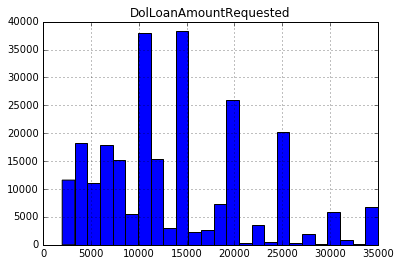

In [26]:
# matplotlib
import matplotlib as mpl
# matplotlib plotting functions
import matplotlib.pyplot as plt
# we want our plots inline
%matplotlib inline
dfh = pd.DataFrame(df.DolLoanAmountRequested)
dfh.hist(bins = 25);

<hr>
### Convert to Boolean data type `BoolPartialFundingApproved` to integer

In [27]:
df['BoolPartialFundingApproved'].dtypes

dtype('bool')

In [28]:
df['BoolPartialFundingApproved'] = df['BoolPartialFundingApproved'].astype(int)

In [29]:
df['BoolPartialFundingApproved'].head()

0    1
1    1
2    1
3    1
4    1
Name: BoolPartialFundingApproved, dtype: int64

<hr>
# CreditGrade feature

In [30]:
# First check Unique Values in CreditGrade
pd.unique(df.CreditGrade.ravel())

array(['B', 'D', 'A', 'AA', 'C', 'E', 'HR'], dtype=object)

### Drop Columns we don't need anymore

In [31]:
df.drop(['DateCreditPulled','DateListingStart', 'DateListingCreation'], inplace=True, axis=1)

In [32]:
df.ix[:,0:31].head()

,ListingNumber,DateListingDelay,DateCreditPulled_Year,DateCreditPulled_Month,DateCreditPulled_Day,DateCreditPulled_day_of_week,DateCreditPulled_day_of_year,DateCreditPulled_weekofyear,DateCreditPulled_is_month_start,DateCreditPulled_is_month_end,...,DateListingCreation_day_of_week,DateListingCreation_day_of_year,DateListingCreation_weekofyear,DateListingCreation_is_month_start,DateListingCreation_is_month_end,EnumListingStatus,DolLoanAmountRequested,BoolPartialFundingApproved,CreditGrade,LenderYield
0,973605,105,2013,10,13,6,286,41,0,0,...,6,286,41,0,0,1,15000,1,B,0.1520
1,981099,86,2013,10,15,1,288,42,0,0,...,1,288,42,0,0,1,15000,1,B,0.1485
2,1025766,76,2013,11,6,2,310,45,0,0,...,2,310,45,0,0,0,4000,1,D,0.1985
3,1003835,55,2013,11,8,4,312,45,0,0,...,4,312,45,0,0,1,10000,1,A,0.1199
4,1011335,59,2013,11,11,0,315,46,0,0,...,0,315,46,0,0,0,20000,1,B,0.1340


<hr>
### Examine LenderYield

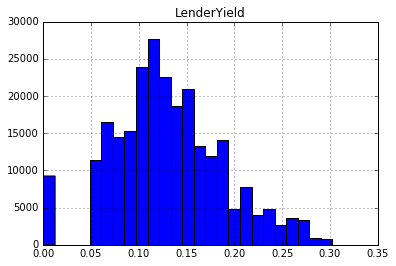

In [33]:
dfLY = pd.DataFrame(df.LenderYield)
dfLY.hist(bins = 25);

<hr>
# 2) Examine Second set of columns

In [34]:
df.ix[:,31:41].columns.tolist()

['BorrowerRate',
 'NumMonthsTerm',
 'DolMonthlyLoanPayment',
 'FICOScore',
 'ProsperScore',
 'EnumListingCategory',
 'DolMonthlyIncome',
 'BoolIncomeVerifiable',
 'FracDebtToIncomeRatio',
 'StrEmploymentStatus']

## Description of Each Column (31-40)
    31. `BorrowerRate` - Some type of borrowing ratio?
    32. `NumMonthsTerm` - Number of months of the term of the Loan
    33. `DolMonthlyLoanPayment` - Monthly Loan repayment in Dollars
    34. `FICOScore` - Fico Score
    35. `ProsperScore` - Prosper Score - Another type of Credit Score?
    36. `EnumListingCategory` - Another Type of numerical classification. Does not appear to be ordinal.
    37. `DolMonthlyIncome` - Monthly Income in Dollars, Maximum value of `10,000,000` is a good indication that there could be outliers, errors
    38. `BoolIncomeVerifiable` - Is income verifiable (in Boolean)? Check to see if unique values are only True of False. Convert to 0 and 1
    39. `FracDebtToIncomeRatio` - Ratio of Debt to Income. Maximum Value of 53.23 indicates there could be outliers. Also, it look like there is a lot of missing values in this column by looking at the column counts (252,469 - 236,862 = 15,607). Will need to figure out how to impute these values.
    40. `StrEmploymentStatus` - A classification of a person's employment status (employed, self-employed, etc.). Need to get unique  values and convert.

In [35]:
df.ix[:,31:41].head(10)

,BorrowerRate,NumMonthsTerm,DolMonthlyLoanPayment,FICOScore,ProsperScore,EnumListingCategory,DolMonthlyIncome,BoolIncomeVerifiable,FracDebtToIncomeRatio,StrEmploymentStatus
0,0.1620,60,366.37,689,6,1,6000.0000,True,0.27,Employed
1,0.1585,60,363.58,709,8,1,7916.6667,True,0.35,Other
2,0.2085,36,150.39,669,6,1,2083.3333,True,0.53,Employed
3,0.1299,36,336.89,749,5,13,3750.0000,True,0.14,Employed
4,0.1440,60,469.52,649,11,1,9000.0000,True,0.16,Employed
5,0.2225,36,383.20,689,4,1,8416.6667,True,0.45,Employed
6,0.0809,36,470.67,689,11,3,6250.0000,False,NaN,Self-employed
7,0.0769,36,218.35,789,8,3,3333.3333,True,0.16,Employed
8,0.1314,36,168.81,669,7,1,6450.9167,True,0.15,Employed
9,0.1314,60,433.67,709,10,1,12500.0000,True,0.28,Employed


In [36]:
df.ix[:,31:41].describe()

,BorrowerRate,NumMonthsTerm,DolMonthlyLoanPayment,FICOScore,ProsperScore,EnumListingCategory,DolMonthlyIncome,BoolIncomeVerifiable,FracDebtToIncomeRatio
count,252469.000000,252469.000000,252469.000000,252469.000000,252459.000000,252469.000000,252469.000000,252469,236862.000000
mean,0.145653,43.925821,410.170272,699.975858,6.637799,2.572819,6995.399571,0.938143,0.257345
std,0.052620,11.287230,230.729467,37.696744,2.489146,3.898659,27229.350999,0.240896,0.156545
min,0.060000,36.000000,40.300000,649.000000,2.000000,0.000000,0.000000,False,0.000000
25%,0.108900,36.000000,233.640000,669.000000,4.000000,1.000000,3916.666700,1,0.170000
50%,0.138500,36.000000,369.170000,689.000000,7.000000,1.000000,5416.666700,1,0.250000
75%,0.179000,60.000000,550.670000,729.000000,8.000000,1.000000,7666.666700,1,0.330000
max,0.312500,60.000000,1210.720000,835.000000,21.000000,21.000000,10000000.000000,True,53.230000


### Are there missing data in these columns?

In [37]:
pd.isnull(df.ix[:,31:41]).sum()

BorrowerRate                 0
NumMonthsTerm                0
DolMonthlyLoanPayment        0
FICOScore                    0
ProsperScore                10
EnumListingCategory          0
DolMonthlyIncome             0
BoolIncomeVerifiable         0
FracDebtToIncomeRatio    15607
StrEmploymentStatus          0
dtype: int64

### Relatively small number of missing values in ProsperScore and a lot missing data in FracDebtToIncomeRatio

### NumMonthsTerm appears to take on two values: 36 months and 60 months

In [38]:
# Check unique values
pd.unique(df.NumMonthsTerm.ravel())

array([60, 36])

### Convert to Categorical / Binary

In [39]:
class_le = LabelEncoder()
df['NumMonthsTerm'] = class_le.fit_transform(df['NumMonthsTerm'].values)
df['NumMonthsTerm'].head(10)

0    1
1    1
2    0
3    0
4    1
5    0
6    0
7    0
8    0
9    1
Name: NumMonthsTerm, dtype: int64

In [40]:
# To convert back
class_le.inverse_transform(df['NumMonthsTerm'])

array([60, 60, 36, ..., 60, 36, 36])

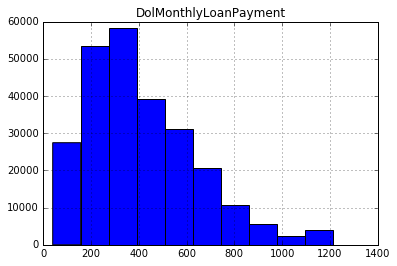

In [41]:
pd.DataFrame(df.DolMonthlyLoanPayment).hist(bins = 10);

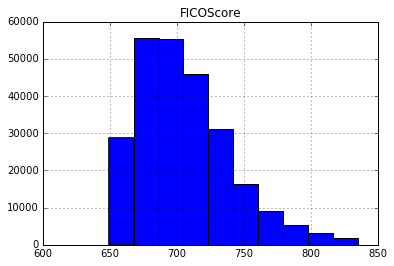

In [42]:
pd.DataFrame(df.FICOScore).hist(bins = 10);

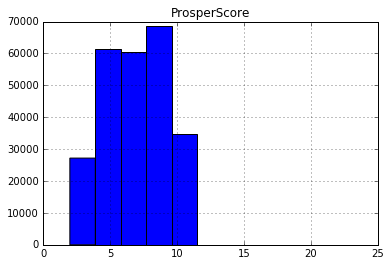

In [43]:
pd.DataFrame(df.ProsperScore).hist(bins = 10);

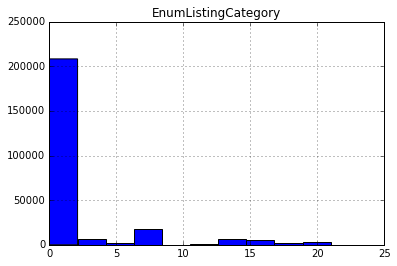

In [44]:
pd.DataFrame(df.EnumListingCategory).hist(bins = 10);

In [45]:
# Check unique values
pd.unique(df.EnumListingCategory.ravel())

array([ 1, 13,  3, 15, 14, 20,  2,  7,  6, 19, 12, 18,  8,  9, 16, 17, 11,
        0, 21])

In [46]:
df.groupby(['EnumListingCategory']).mean().ix[:,26:31]

,EnumListingStatus,DolLoanAmountRequested,BoolPartialFundingApproved,LenderYield,BorrowerRate
EnumListingCategory,,,,,
0,0.355263,13969.741228,0.982456,0.125847,0.142427
1,0.322420,14232.552691,0.978333,0.130056,0.144635
2,0.352350,12948.360764,0.946669,0.132825,0.147706
3,0.421997,14921.323876,0.975401,0.139794,0.156387
6,0.374668,8397.778113,0.873782,0.134631,0.149253
7,0.376605,11806.218857,0.932868,0.129893,0.144661
8,0.330864,12978.501235,0.958025,0.135170,0.149327
9,0.343750,10354.031250,0.900000,0.134952,0.147824
11,0.336336,9439.028078,0.906907,0.133894,0.145683


In [47]:
df.groupby(['EnumListingCategory']).count()

,ListingNumber,DateListingDelay,DateCreditPulled_Year,DateCreditPulled_Month,DateCreditPulled_Day,DateCreditPulled_day_of_week,DateCreditPulled_day_of_year,DateCreditPulled_weekofyear,DateCreditPulled_is_month_start,DateCreditPulled_is_month_end,...,NumSatisfactoryAccounts,NumWasDelinquentDerog,NumDelinquenciesOver30Days,NumDelinquenciesOver60Days,BoolOwnsHome,EnumLoanFractionalType,DateWholeLoanStart,DateWholeLoanEnd,BoolEverWholeLoan,BoolIsFractionalLoan
EnumListingCategory,,,,,,,,,,,,,,,,,,,,,
0,228,228,228,228,228,228,228,228,228,228,...,228,228,228,228,228,228,216,2,228,228
1,195363,195363,195363,195363,195363,195363,195363,195363,195363,195363,...,195363,195363,195363,195363,195363,195363,180438,4874,195363,195363
2,12638,12638,12638,12638,12638,12638,12638,12638,12638,12638,...,12638,12638,12638,12638,12638,12638,11608,314,12638,12638
3,6301,6301,6301,6301,6301,6301,6301,6301,6301,6301,...,6301,6301,6301,6301,6301,6301,5757,252,6301,6301
6,2258,2258,2258,2258,2258,2258,2258,2258,2258,2258,...,2258,2258,2258,2258,2258,2258,2038,51,2258,2258
7,17756,17756,17756,17756,17756,17756,17756,17756,17756,17756,...,17756,17756,17756,17756,17756,17756,16383,544,17756,17756
8,405,405,405,405,405,405,405,405,405,405,...,405,405,405,405,405,405,364,12,405,405
9,160,160,160,160,160,160,160,160,160,160,...,160,160,160,160,160,160,148,4,160,160
11,333,333,333,333,333,333,333,333,333,333,...,333,333,333,333,333,333,306,6,333,333


Grouping by EnumListingCategory and examining the mean of the EnumListingStatus does not reveal any correlation between Listing status and Listing Category

This feature is heavily skewed towards Category 1. We might need to examine how we do cross-validation

### Assuming that these are categories and that there is no order to these numbers.


### Keep as one feature and then convert to factor using H2O

<hr>
### Examine DolMonthlyIncome
Maximum value of `10,000,000` is a good indication that there could be outliers, errors

In [48]:
df.ix[:,31:41].head(10)

,BorrowerRate,NumMonthsTerm,DolMonthlyLoanPayment,FICOScore,ProsperScore,EnumListingCategory,DolMonthlyIncome,BoolIncomeVerifiable,FracDebtToIncomeRatio,StrEmploymentStatus
0,0.1620,1,366.37,689,6,1,6000.0000,True,0.27,Employed
1,0.1585,1,363.58,709,8,1,7916.6667,True,0.35,Other
2,0.2085,0,150.39,669,6,1,2083.3333,True,0.53,Employed
3,0.1299,0,336.89,749,5,13,3750.0000,True,0.14,Employed
4,0.1440,1,469.52,649,11,1,9000.0000,True,0.16,Employed
5,0.2225,0,383.20,689,4,1,8416.6667,True,0.45,Employed
6,0.0809,0,470.67,689,11,3,6250.0000,False,NaN,Self-employed
7,0.0769,0,218.35,789,8,3,3333.3333,True,0.16,Employed
8,0.1314,0,168.81,669,7,1,6450.9167,True,0.15,Employed
9,0.1314,1,433.67,709,10,1,12500.0000,True,0.28,Employed


In [49]:
df.ix[:,31:41].describe()

,BorrowerRate,NumMonthsTerm,DolMonthlyLoanPayment,FICOScore,ProsperScore,EnumListingCategory,DolMonthlyIncome,BoolIncomeVerifiable,FracDebtToIncomeRatio
count,252469.000000,252469.000000,252469.000000,252469.000000,252459.000000,252469.000000,252469.000000,252469,236862.000000
mean,0.145653,0.330243,410.170272,699.975858,6.637799,2.572819,6995.399571,0.938143,0.257345
std,0.052620,0.470301,230.729467,37.696744,2.489146,3.898659,27229.350999,0.240896,0.156545
min,0.060000,0.000000,40.300000,649.000000,2.000000,0.000000,0.000000,False,0.000000
25%,0.108900,0.000000,233.640000,669.000000,4.000000,1.000000,3916.666700,1,0.170000
50%,0.138500,0.000000,369.170000,689.000000,7.000000,1.000000,5416.666700,1,0.250000
75%,0.179000,1.000000,550.670000,729.000000,8.000000,1.000000,7666.666700,1,0.330000
max,0.312500,1.000000,1210.720000,835.000000,21.000000,21.000000,10000000.000000,True,53.230000


In [50]:
df.loc[(df['DolMonthlyIncome'] >= 500000)].groupby('EnumListingStatus').count()

,ListingNumber,DateListingDelay,DateCreditPulled_Year,DateCreditPulled_Month,DateCreditPulled_Day,DateCreditPulled_day_of_week,DateCreditPulled_day_of_year,DateCreditPulled_weekofyear,DateCreditPulled_is_month_start,DateCreditPulled_is_month_end,...,NumSatisfactoryAccounts,NumWasDelinquentDerog,NumDelinquenciesOver30Days,NumDelinquenciesOver60Days,BoolOwnsHome,EnumLoanFractionalType,DateWholeLoanStart,DateWholeLoanEnd,BoolEverWholeLoan,BoolIsFractionalLoan
EnumListingStatus,,,,,,,,,,,,,,,,,,,,,
0,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,6,0,9,9
1,58,58,58,58,58,58,58,58,58,58,...,58,58,58,58,58,58,55,2,58,58


### Cannot tell if these errors; misstated income

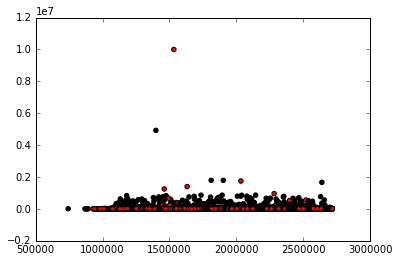

In [51]:
colors = np.where(df.EnumListingStatus == 0, 'r', 'k')
plt.scatter(df.ListingNumber, df.DolMonthlyIncome , c=colors)

<hr>
### Convert BoolIncomeVerifiable

In [52]:
df['BoolIncomeVerifiable'] = df['BoolIncomeVerifiable'].astype(int)

In [53]:
df['BoolIncomeVerifiable'].head()

0    1
1    1
2    1
3    1
4    1
Name: BoolIncomeVerifiable, dtype: int64

<hr>
### Examine FracDebtToIncomeRatio

In [54]:
df.loc[(df['FracDebtToIncomeRatio'] >= 1)].ix[:,:41]

,ListingNumber,DateListingDelay,DateCreditPulled_Year,DateCreditPulled_Month,DateCreditPulled_Day,DateCreditPulled_day_of_week,DateCreditPulled_day_of_year,DateCreditPulled_weekofyear,DateCreditPulled_is_month_start,DateCreditPulled_is_month_end,...,BorrowerRate,NumMonthsTerm,DolMonthlyLoanPayment,FICOScore,ProsperScore,EnumListingCategory,DolMonthlyIncome,BoolIncomeVerifiable,FracDebtToIncomeRatio,StrEmploymentStatus
13329,1212594,0,2014,2,16,6,47,7,0,0,...,0.2394,0,117.60,649,3,1,11.5833,1,53.23,Other
14135,1162879,0,2014,2,19,2,50,8,0,0,...,0.1685,0,142.31,749,2,19,150.0000,1,1.01,Other
19761,1253229,9,2014,3,10,0,69,11,0,0,...,0.2574,0,401.52,689,2,1,833.3333,1,1.78,Employed


### One value has a FracDebtToIncomeRatio = 53.23, which is much higher than typical values.
Drop this row

In [55]:
df = df[df.ListingNumber != 1212594]

<hr> 
### Examine StrEmploymentStatus

In [56]:
# Check unique values
pd.unique(df.StrEmploymentStatus.ravel())

array(['Employed', 'Other', 'Self-employed', 'Full-time', 'Part-time',
       'Not employed'], dtype=object)

### Keep as one feature and then convert to factor using H2O

<hr>
# 3) Examine Third set of columns

In [57]:
df.ix[:,41:51].columns.tolist()

['StrOccupation',
 'NumMonthsEmployed',
 'StrState',
 'StrBorrowerCity',
 'NumPriorProsperLoansActive',
 'NumPriorProsperLoans',
 'DolPriorProsperLoansPrincipalBorrowed',
 'DolPriorProsperLoansPrincipalOutstanding',
 'DolPriorProsperLoansBalanceOutstanding',
 'NumPriorProsperLoansCyclesBilled']

### Description of Each Column
* `StrOccupation` - Type of occupation, classification; How many categories? need to dummify?, A lot of missing values
* `NumMonthsEmployed` - Self-explanatory, There are negative values which don't make much sense. 18 values are missing
* `StrState` - State, need to dummify
* `StrBorrowerCity` - City, how many unique values are there? Would there be too many to dummify?
* `NumPriorProsperLoansActive`- Number of Prior Prosper Loans Active
* `NumPriorProsperLoans`- Number of Prior Prosper Loans 
* `DolPriorProsperLoansPrincipalBorrowed` - Principal of Prosper Loan Borrowed - A lot of missing values, set to 0?
* `DolPriorProsperLoansPrincipalOutstanding` - Principal of Prosper Loan Outstanding - A lot of missing values, set to 0?
* `DolPriorProsperLoansBalanceOutstanding`  - Balance of Prosper Loan Outstanding - A lot of missing values, set to 0?
* `NumPriorProsperLoansCyclesBilled` - Number of Prosper Loan Cycles Billed - A lot of missing values, set to 0?

In [58]:
df.ix[:,41:51].head(10)

,StrOccupation,NumMonthsEmployed,StrState,StrBorrowerCity,NumPriorProsperLoansActive,NumPriorProsperLoans,DolPriorProsperLoansPrincipalBorrowed,DolPriorProsperLoansPrincipalOutstanding,DolPriorProsperLoansBalanceOutstanding,NumPriorProsperLoansCyclesBilled
0,Tradesman - Mechanic,445,VA,VIRGINIA BCH,0,0,NaN,NaN,NaN,NaN
1,NaN,32,CA,ACTON,0,0,NaN,NaN,NaN,NaN
2,Professional,4,MN,MINNEAPOLIS,1,3,14400,4440.72,4442.52,52
3,Medical Technician,2,OK,OKLAHOMA CITY,0,0,NaN,NaN,NaN,NaN
4,Executive,90,MN,BELLE PLAINE,0,1,2600,0.00,0.00,33
5,Professional,125,AL,MONTGOMERY,0,0,NaN,NaN,NaN,NaN
6,Food Service,9,FL,MARY ESTHER,0,1,4000,0.00,0.00,10
7,Retail Management,22,NY,STATEN ISLAND,0,0,NaN,NaN,NaN,NaN
8,Other,268,VA,HERNDON,0,0,NaN,NaN,NaN,NaN
9,Pharmacist,190,VA,CULPEPER,0,0,NaN,NaN,NaN,NaN


In [59]:
df.ix[:,41:51].describe()

,NumMonthsEmployed,NumPriorProsperLoansActive,NumPriorProsperLoans,DolPriorProsperLoansPrincipalBorrowed,DolPriorProsperLoansPrincipalOutstanding,DolPriorProsperLoansBalanceOutstanding,NumPriorProsperLoansCyclesBilled
count,252450.000000,252468.000000,252468.000000,16289.000000,16289.000000,16289.000000,16289.000000
mean,108.654078,0.042849,0.088918,12310.094987,5006.933356,5040.034897,20.064768
std,104.203445,0.202556,0.396590,8911.729405,5652.686277,5686.087875,20.473965
min,-9.000000,0.000000,0.000000,1000.000000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,0.000000,5000.000000,0.000000,0.000000,9.000000
50%,79.000000,0.000000,0.000000,10000.000000,3102.990000,3124.380000,12.000000
75%,160.000000,0.000000,0.000000,15000.000000,8428.050000,8477.090000,24.000000
max,662.000000,2.000000,10.000000,84499.000000,32543.340000,32750.190000,154.000000


### Are there any missing data in these columns?


In [60]:
pd.isnull(df.ix[:,51:61]).sum()

NumPriorProsperLoansOnTimePayments    236179
NumPriorProsperLoansLateCycles        236179
NumPriorProsperLoansLatePayments      236179
DolMaxPriorProsperLoan                236171
DolMinPriorProsperLoan                236171
NumPriorProsperLoansEarliestPayOff    245555
NumPriorProsperLoans31dpd             252342
NumPriorProsperLoans61dpd             252418
BoolIsLender                               0
BoolInGroup                                0
dtype: int64

<hr>
### Examine StrOccupation
* Check Unique Values
* Take care of missing Values
* Dummify StrOccupation

In [61]:
# Check unique values
pd.unique(df.StrOccupation.ravel())

array(['Tradesman - Mechanic', nan, 'Professional', 'Medical Technician',
       'Executive', 'Food Service', 'Retail Management', 'Other',
       'Pharmacist', 'Attorney', 'Food Service Management',
       'Sales - Retail', 'Civil Service', 'Professor', 'Nurse (RN)',
       'Analyst', 'Computer Programmer', 'Military Enlisted',
       'Police Officer/Correction Officer', 'Truck Driver', 'Doctor',
       'Landscaping', 'Skilled Labor', 'Administrative Assistant',
       'Nurse (LPN)', 'Engineer - Mechanical', 'Accountant/CPA',
       'Construction', 'Teacher', 'Clerical', 'Principal', 'Dentist',
       'Laborer', 'Engineer - Electrical', 'Sales - Commission',
       "Teacher's Aide", 'Postal Service', 'Fireman', 'Social Worker',
       'Chemist', 'Psychologist', 'Tradesman - Electrician',
       'Pilot - Private/Commercial', 'Realtor', 'Waiter/Waitress',
       'Bus Driver', 'Scientist', "Nurse's Aide", 'Car Dealer',
       'Architect', 'Student - College Graduate Student', 'Homemaker'

67 categories and NaNs
<hr>
### Change NaNs to 'Other'

In [62]:
df['StrOccupation'] = df.StrOccupation.fillna(value='Other')

In [63]:
pd.isnull(df.ix[:,41]).sum()

0

### Keep StrOccupation as one feature and then convert to factor using H2O
<hr>
### Examine NumMonthsEmployed 
* What about negative Values?
* Missing Data?

In [64]:
df.loc[(df['NumMonthsEmployed'] < 0)].ix[:,41:51].head(10)

,StrOccupation,NumMonthsEmployed,StrState,StrBorrowerCity,NumPriorProsperLoansActive,NumPriorProsperLoans,DolPriorProsperLoansPrincipalBorrowed,DolPriorProsperLoansPrincipalOutstanding,DolPriorProsperLoansBalanceOutstanding,NumPriorProsperLoansCyclesBilled
34,Other,-1,IL,AURORA,0,0,NaN,NaN,NaN,NaN
68,Other,-1,WI,MEDFORD,0,0,NaN,NaN,NaN,NaN
134,Other,-1,MI,AUBURN HILLS,0,0,NaN,NaN,NaN,NaN
157,Other,-1,HI,HONOLULU,0,0,NaN,NaN,NaN,NaN
198,Other,-1,TX,VON ORMY,0,0,NaN,NaN,NaN,NaN
245,Sales - Commission,-1,TX,SPRING,0,0,NaN,NaN,NaN,NaN
260,Other,-1,CA,LONG BEACH,0,0,NaN,NaN,NaN,NaN
334,Other,-1,OH,ELYRIA,0,0,NaN,NaN,NaN,NaN
356,Other,-1,IL,CHICAGO,0,0,NaN,NaN,NaN,NaN
425,Other,-1,NY,ASTORIA,0,0,NaN,NaN,NaN,NaN


### Assuming that these values are actually positive

In [65]:
df['NumMonthsEmployed'] = df['NumMonthsEmployed'].abs()

In [66]:
df.loc[(df['NumMonthsEmployed'] < 0)].ix[:,41:51]

,StrOccupation,NumMonthsEmployed,StrState,StrBorrowerCity,NumPriorProsperLoansActive,NumPriorProsperLoans,DolPriorProsperLoansPrincipalBorrowed,DolPriorProsperLoansPrincipalOutstanding,DolPriorProsperLoansBalanceOutstanding,NumPriorProsperLoansCyclesBilled


In [67]:
pd.isnull(df.ix[:,41:51]).sum()

StrOccupation                                    0
NumMonthsEmployed                               18
StrState                                         0
StrBorrowerCity                                  0
NumPriorProsperLoansActive                       0
NumPriorProsperLoans                             0
DolPriorProsperLoansPrincipalBorrowed       236179
DolPriorProsperLoansPrincipalOutstanding    236179
DolPriorProsperLoansBalanceOutstanding      236179
NumPriorProsperLoansCyclesBilled            236179
dtype: int64

In [68]:
df['NumMonthsEmployed'] = df.NumMonthsEmployed.fillna(value=0)

<hr>

### Examine StrState and StrBorrowerCity

In [69]:
# Check unique values
pd.unique(df.StrState.ravel())

array(['VA', 'CA', 'MN', 'OK', 'AL', 'FL', 'NY', 'TN', 'MI', 'UT', 'OH',
       'TX', 'WI', 'AZ', 'GA', 'IL', 'NJ', 'WA', 'CO', 'KS', 'NC', 'MA',
       'LA', 'NV', 'IN', 'SC', 'ID', 'NM', 'CT', 'OR', 'KY', 'PA', 'RI',
       'NH', 'MD', 'HI', 'DC', 'VT', 'AK', 'MO', 'DE', 'WV', 'NE', 'MS',
       'AR', 'SD', 'MT', 'WY'], dtype=object)

### Keep as one feature and then convert to factor using H2O

In [70]:
# Check unique values
pd.unique(df.StrBorrowerCity.ravel())

array(['VIRGINIA BCH', 'ACTON', 'MINNEAPOLIS', ..., 'buckey',
       'Sharonville ', 'w .covina'], dtype=object)

### Keep as one feature and then convert to factor using H2O

### Can get socioeconomic data for cities (Median Income, Unemployment rate, Percentage with College Degree, etc.) and then partition cities according to this socioeconomic data)

### Examine NumPriorProsperLoansActive Thru NumPriorProsperLoansCyclesBilled
* Main issue is that there is a missing data
* Can we impute that these values should be 0 given that there is likely to be missing data if borrower had not taken out a Prosper Loan previously?
* `NumPriorProsperLoansActive` - Number of Prior Prosper Loans Active
* `NumPriorProsperLoans` - Number of Prior Prosper Loans
* `DolPriorProsperLoansPrincipalBorrowed` - Principal of Prosper Loan Borrowed - A lot of missing values, set to 0?
* `DolPriorProsperLoansPrincipalOutstanding` - Principal of Prosper Loan Outstanding - A lot of missing values, set to 0?
* `DolPriorProsperLoansBalanceOutstanding` - Balance of Prosper Loan Outstanding - A lot of missing values, set to 0?
* `NumPriorProsperLoansCyclesBilled` - Number of Prosper Loan Cycles Billed - A lot of missing values, set to 0?

In [71]:
# Check unique values
pd.unique(df.NumPriorProsperLoansActive.ravel())

array([0, 1, 2])

In [72]:
# Check unique values
pd.unique(df.NumPriorProsperLoans.ravel())

array([ 0,  3,  1,  4,  5,  2,  6,  7,  8,  9, 10])

In [73]:
pd.isnull(df.ix[:,41:51]).sum()

StrOccupation                                    0
NumMonthsEmployed                                0
StrState                                         0
StrBorrowerCity                                  0
NumPriorProsperLoansActive                       0
NumPriorProsperLoans                             0
DolPriorProsperLoansPrincipalBorrowed       236179
DolPriorProsperLoansPrincipalOutstanding    236179
DolPriorProsperLoansBalanceOutstanding      236179
NumPriorProsperLoansCyclesBilled            236179
dtype: int64

In [74]:
df.loc[(df['NumPriorProsperLoans'] == 0)].ix[:,41:51].head(10)

,StrOccupation,NumMonthsEmployed,StrState,StrBorrowerCity,NumPriorProsperLoansActive,NumPriorProsperLoans,DolPriorProsperLoansPrincipalBorrowed,DolPriorProsperLoansPrincipalOutstanding,DolPriorProsperLoansBalanceOutstanding,NumPriorProsperLoansCyclesBilled
0,Tradesman - Mechanic,445,VA,VIRGINIA BCH,0,0,NaN,NaN,NaN,NaN
1,Other,32,CA,ACTON,0,0,NaN,NaN,NaN,NaN
3,Medical Technician,2,OK,OKLAHOMA CITY,0,0,NaN,NaN,NaN,NaN
5,Professional,125,AL,MONTGOMERY,0,0,NaN,NaN,NaN,NaN
7,Retail Management,22,NY,STATEN ISLAND,0,0,NaN,NaN,NaN,NaN
8,Other,268,VA,HERNDON,0,0,NaN,NaN,NaN,NaN
9,Pharmacist,190,VA,CULPEPER,0,0,NaN,NaN,NaN,NaN
11,Other,438,OK,BROKEN ARROW,0,0,NaN,NaN,NaN,NaN
12,Other,19,VA,ARLINGTON,0,0,NaN,NaN,NaN,NaN
15,Food Service Management,76,NY,SHOREHAM,0,0,NaN,NaN,NaN,NaN


### Appears that these columns have missing values because there are no active or prior Prosper Loans, 
Can set NaN to 0

In [75]:
df['DolPriorProsperLoansPrincipalBorrowed'] = df.DolPriorProsperLoansPrincipalBorrowed.fillna(value=0)
df['DolPriorProsperLoansPrincipalOutstanding'] = df.DolPriorProsperLoansPrincipalOutstanding.fillna(value=0)
df['DolPriorProsperLoansBalanceOutstanding'] = df.DolPriorProsperLoansBalanceOutstanding.fillna(value=0)
df['NumPriorProsperLoansCyclesBilled'] = df.NumPriorProsperLoansCyclesBilled.fillna(value=0)

In [76]:
pd.isnull(df.ix[:,41:51]).sum()

StrOccupation                               0
NumMonthsEmployed                           0
StrState                                    0
StrBorrowerCity                             0
NumPriorProsperLoansActive                  0
NumPriorProsperLoans                        0
DolPriorProsperLoansPrincipalBorrowed       0
DolPriorProsperLoansPrincipalOutstanding    0
DolPriorProsperLoansBalanceOutstanding      0
NumPriorProsperLoansCyclesBilled            0
dtype: int64

<hr>
# 4) Examine Fourth set of columns

In [77]:
df.ix[:,51:61].columns.tolist()

['NumPriorProsperLoansOnTimePayments',
 'NumPriorProsperLoansLateCycles',
 'NumPriorProsperLoansLatePayments',
 'DolMaxPriorProsperLoan',
 'DolMinPriorProsperLoan',
 'NumPriorProsperLoansEarliestPayOff',
 'NumPriorProsperLoans31dpd',
 'NumPriorProsperLoans61dpd',
 'BoolIsLender',
 'BoolInGroup']

### Description of Each Column
* `NumPriorProsperLoansOnTimePayments` - 
* `NumPriorProsperLoansLateCycles` - 
* `NumPriorProsperLoansLatePayments` - 
* `DolMaxPriorProsperLoan` - 
* `DolMinPriorProsperLoan` - 
* `NumPriorProsperLoansEarliestPayOff` - 
* `NumPriorProsperLoans31dpd` - 
* `NumPriorProsperLoans61dpd` - 
* `BoolIsLender` - 
* `BoolInGroup` - 

In [78]:
df.ix[:,51:61].head(10)

,NumPriorProsperLoansOnTimePayments,NumPriorProsperLoansLateCycles,NumPriorProsperLoansLatePayments,DolMaxPriorProsperLoan,DolMinPriorProsperLoan,NumPriorProsperLoansEarliestPayOff,NumPriorProsperLoans31dpd,NumPriorProsperLoans61dpd,BoolIsLender,BoolInGroup
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False
2,52,0,0,8000,1400,10,NaN,NaN,0,False
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False
4,31,2,0,2600,2600,34,NaN,NaN,0,False
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False
6,10,0,0,4000,4000,11,NaN,NaN,1,False
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False


In [79]:
df.ix[:,51:61].describe()

,NumPriorProsperLoansOnTimePayments,NumPriorProsperLoansLateCycles,NumPriorProsperLoansLatePayments,DolMaxPriorProsperLoan,DolMinPriorProsperLoan,NumPriorProsperLoansEarliestPayOff,NumPriorProsperLoans31dpd,NumPriorProsperLoans61dpd,BoolIsLender,BoolInGroup
count,16289.000000,16289.000000,16289.000000,16297.000000,16297.000000,6913.000000,126.000000,50.000000,252468.000000,252468
mean,19.705016,0.359752,0.030880,10275.786716,8948.380115,11.135831,1.039683,1.060000,0.012433,0.002634
std,20.095682,2.131280,0.485893,6460.991120,6452.928698,9.197435,0.195992,0.239898,0.110809,0.0512549
min,0.000000,0.000000,0.000000,1000.000000,1000.000000,0.000000,1.000000,1.000000,0.000000,False
25%,9.000000,0.000000,0.000000,4500.000000,4000.000000,4.000000,1.000000,1.000000,0.000000,0
50%,12.000000,0.000000,0.000000,10000.000000,7000.000000,8.000000,1.000000,1.000000,0.000000,0
75%,23.000000,0.000000,0.000000,15000.000000,13000.000000,16.000000,1.000000,1.000000,0.000000,0
max,154.000000,54.000000,25.000000,35000.000000,35000.000000,37.000000,2.000000,2.000000,1.000000,True


### Are there any missing data in these columns?


In [80]:
pd.isnull(df.ix[:,51:61]).sum()

NumPriorProsperLoansOnTimePayments    236179
NumPriorProsperLoansLateCycles        236179
NumPriorProsperLoansLatePayments      236179
DolMaxPriorProsperLoan                236171
DolMinPriorProsperLoan                236171
NumPriorProsperLoansEarliestPayOff    245555
NumPriorProsperLoans31dpd             252342
NumPriorProsperLoans61dpd             252418
BoolIsLender                               0
BoolInGroup                                0
dtype: int64

### Main issue with the first 8 columns of this set of Features is missing data
Again, set NaNs to 0 since this data would be missing since they hadn't taken out loans before

In [81]:
df.loc[(df['NumPriorProsperLoans'] == 0)].ix[:,51:61].head(10)

,NumPriorProsperLoansOnTimePayments,NumPriorProsperLoansLateCycles,NumPriorProsperLoansLatePayments,DolMaxPriorProsperLoan,DolMinPriorProsperLoan,NumPriorProsperLoansEarliestPayOff,NumPriorProsperLoans31dpd,NumPriorProsperLoans61dpd,BoolIsLender,BoolInGroup
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False


In [82]:
df['NumPriorProsperLoansOnTimePayments'] = df.NumPriorProsperLoansOnTimePayments.fillna(value=0)
df['NumPriorProsperLoansLateCycles'] = df.NumPriorProsperLoansLateCycles.fillna(value=0)
df['NumPriorProsperLoansLatePayments'] = df.NumPriorProsperLoansLatePayments.fillna(value=0)
df['DolMaxPriorProsperLoan'] = df.DolMaxPriorProsperLoan.fillna(value=0)
df['DolMinPriorProsperLoan'] = df.DolMinPriorProsperLoan.fillna(value=0)
df['NumPriorProsperLoansEarliestPayOff'] = df.NumPriorProsperLoansEarliestPayOff.fillna(value=0)
df['NumPriorProsperLoans31dpd'] = df.NumPriorProsperLoans31dpd.fillna(value=0)
df['NumPriorProsperLoans61dpd'] = df.NumPriorProsperLoans61dpd.fillna(value=0)

In [83]:
pd.isnull(df.ix[:,51:61]).sum()

NumPriorProsperLoansOnTimePayments    0
NumPriorProsperLoansLateCycles        0
NumPriorProsperLoansLatePayments      0
DolMaxPriorProsperLoan                0
DolMinPriorProsperLoan                0
NumPriorProsperLoansEarliestPayOff    0
NumPriorProsperLoans31dpd             0
NumPriorProsperLoans61dpd             0
BoolIsLender                          0
BoolInGroup                           0
dtype: int64

### Check BoolIsLender and BoolInGroup

In [84]:
# Check unique values
pd.unique(df.BoolIsLender.ravel())

array([0, 1])

### BoolIsLender is already 0 and 1

In [85]:
# Check unique values
pd.unique(df.BoolInGroup.ravel())

array([False, True], dtype=object)

### Convert to Boolean data type `BoolInGroup` to integer

In [86]:
df['BoolInGroup'].dtypes

dtype('bool')

In [87]:
df['BoolInGroup'] = df['BoolInGroup'].astype(int)

In [88]:
df['BoolInGroup'].head()

0    0
1    0
2    0
3    0
4    0
Name: BoolInGroup, dtype: int64

<hr>
# 5) Examine Fifth set of columns

In [89]:
df.ix[:,61:71].columns.tolist()

['EnumChannelCode',
 'NumTrades',
 'NumTradesOpened6',
 'NumTradesDelinqOrPastDue6',
 'NumOpenTradesDelinqOrPastDue6',
 'NumTradesCurr30DPDOrDerog6',
 'NumTradesEver90DPDOrDerog',
 'DolTotalBalanceAllOpenTrades6',
 'DolTotalBalanceOnPublicRecords',
 'DolTotalPaymentAllOpenTrades6']

### Description of Each Column
* `EnumChannelCode` - 
* `NumTrades` - 
* `NumTradesOpened6` - 
* `NumTradesDelinqOrPastDue6` - 
* `NumOpenTradesDelinqOrPastDue6` - 
* `NumTradesCurr30DPDOrDerog6` - 
* `NumTradesEver90DPDOrDerog` - 
* `DolTotalBalanceAllOpenTrades6` - 
* `DolTotalBalanceOnPublicRecords` - 
* `DolTotalPaymentAllOpenTrades6` - 

In [90]:
df.ix[:,61:71].head(10)

,EnumChannelCode,NumTrades,NumTradesOpened6,NumTradesDelinqOrPastDue6,NumOpenTradesDelinqOrPastDue6,NumTradesCurr30DPDOrDerog6,NumTradesEver90DPDOrDerog,DolTotalBalanceAllOpenTrades6,DolTotalBalanceOnPublicRecords,DolTotalPaymentAllOpenTrades6
0,70000,29,1,0,0,0,0,121431,0,1348
1,70000,50,1,0,0,0,0,698295,0,4845
2,80000,15,0,0,0,0,1,30590,0,901
3,90000,8,1,0,0,0,0,3100,0,223
4,80000,30,1,0,0,0,1,37844,1249,1239
5,90000,43,0,0,0,0,1,122838,0,3042
6,80000,33,1,0,0,0,3,147525,0,2193
7,40000,9,0,0,0,0,0,9469,0,286
8,90000,29,2,0,0,0,4,36940,0,831
9,70000,32,1,0,0,0,0,298537,0,2953


In [91]:
df.ix[:,61:71].describe()

,EnumChannelCode,NumTrades,NumTradesOpened6,NumTradesDelinqOrPastDue6,NumOpenTradesDelinqOrPastDue6,NumTradesCurr30DPDOrDerog6,NumTradesEver90DPDOrDerog,DolTotalBalanceAllOpenTrades6,DolTotalBalanceOnPublicRecords,DolTotalPaymentAllOpenTrades6
count,252468.000000,252468.000000,252468.000000,252468.000000,252468.000000,252468.000000,252468.000000,252468.000000,252468.000000,252468.000000
mean,61975.299840,24.595010,0.971169,0.074647,0.005941,0.083872,1.423254,144085.599708,990.397468,1787.507831
std,22329.181858,11.359892,1.176460,0.374789,0.081016,0.401385,2.701795,171444.262535,42919.400677,1683.798736
min,40000.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40000.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24338.000000,0.000000,705.000000
50%,50000.000000,23.000000,1.000000,0.000000,0.000000,0.000000,0.000000,75917.500000,0.000000,1397.000000
75%,90000.000000,31.000000,1.000000,0.000000,0.000000,0.000000,2.000000,215922.250000,0.000000,2485.000000
max,90000.000000,128.000000,37.000000,32.000000,4.000000,32.000000,43.000000,5264020.000000,14090776.000000,261865.000000


### Are there any missing data in these columns?


In [92]:
pd.isnull(df.ix[:,61:71]).sum()

EnumChannelCode                   0
NumTrades                         0
NumTradesOpened6                  0
NumTradesDelinqOrPastDue6         0
NumOpenTradesDelinqOrPastDue6     0
NumTradesCurr30DPDOrDerog6        0
NumTradesEver90DPDOrDerog         0
DolTotalBalanceAllOpenTrades6     0
DolTotalBalanceOnPublicRecords    0
DolTotalPaymentAllOpenTrades6     0
dtype: int64

### No Missing Values

### Check EnumChannelCode Column

In [93]:
# Check unique values
pd.unique(df.EnumChannelCode.ravel())

array([70000, 80000, 90000, 40000, 50000])

### It appears that this is some type of classification code without ordinal values

### Keep as one feature and then convert to factor using H2O

<hr>
### Other Variables seem OK but plot some histograms to check
* `NumTrades` - 
* `NumTradesOpened6` - 
* `NumTradesDelinqOrPastDue6` - 
* `NumOpenTradesDelinqOrPastDue6` - 
* `NumTradesCurr30DPDOrDerog6` - 
* `NumTradesEver90DPDOrDerog` - 
* `DolTotalBalanceAllOpenTrades6` - 
* `DolTotalBalanceOnPublicRecords` - 
* `DolTotalPaymentAllOpenTrades6` - 

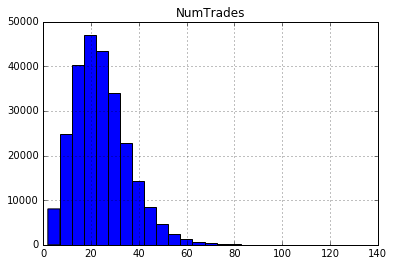

In [94]:
pd.DataFrame(df.NumTrades).hist(bins = 25);

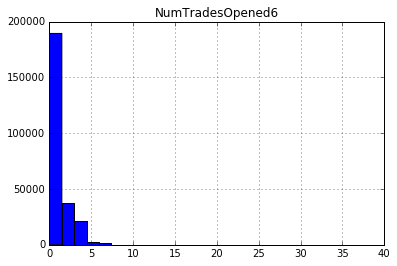

In [95]:
pd.DataFrame(df.NumTradesOpened6).hist(bins = 25);

In [96]:
df.loc[(df['NumTradesOpened6'] >= 12)].ix[:,61:71]

,EnumChannelCode,NumTrades,NumTradesOpened6,NumTradesDelinqOrPastDue6,NumOpenTradesDelinqOrPastDue6,NumTradesCurr30DPDOrDerog6,NumTradesEver90DPDOrDerog,DolTotalBalanceAllOpenTrades6,DolTotalBalanceOnPublicRecords,DolTotalPaymentAllOpenTrades6
38441,40000,19,13,0,0,0,0,41424,0,1114
62641,90000,19,12,0,0,0,1,30653,39283,866
108901,40000,58,12,0,0,0,8,146443,0,2156
118292,90000,36,13,0,0,0,5,38118,0,1292
162391,40000,31,14,0,0,0,0,184559,0,3192
173465,90000,60,12,0,0,0,0,133851,0,2407
177951,90000,59,12,0,0,0,0,216221,0,3340
178796,40000,22,13,0,0,0,0,16281,0,452
184150,90000,72,13,0,0,0,0,439599,0,5003
198604,90000,30,12,0,0,0,2,34376,6511,774


### There are few outliers for NumTradesOpened6 which are greater than or equal to 12

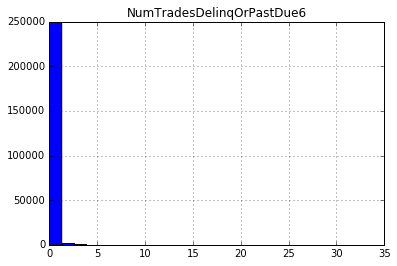

In [97]:
pd.DataFrame(df.NumTradesDelinqOrPastDue6).hist(bins = 25);

In [98]:
df.loc[(df['NumTradesDelinqOrPastDue6'] >= 15)].ix[:,61:71]

,EnumChannelCode,NumTrades,NumTradesOpened6,NumTradesDelinqOrPastDue6,NumOpenTradesDelinqOrPastDue6,NumTradesCurr30DPDOrDerog6,NumTradesEver90DPDOrDerog,DolTotalBalanceAllOpenTrades6,DolTotalBalanceOnPublicRecords,DolTotalPaymentAllOpenTrades6
15256,90000,48,2,19,0,19,23,150622,0,2378
109839,90000,8,1,16,0,16,17,14579,0,373
222529,40000,25,0,32,0,32,43,2698,0,231
244959,90000,22,0,27,0,27,28,5,0,94


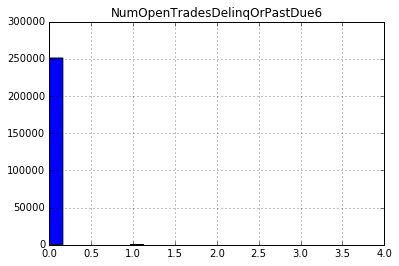

In [99]:
pd.DataFrame(df.NumOpenTradesDelinqOrPastDue6).hist(bins = 25);

In [100]:
df.loc[(df['NumOpenTradesDelinqOrPastDue6'] >= 4)].ix[:,61:71]

,EnumChannelCode,NumTrades,NumTradesOpened6,NumTradesDelinqOrPastDue6,NumOpenTradesDelinqOrPastDue6,NumTradesCurr30DPDOrDerog6,NumTradesEver90DPDOrDerog,DolTotalBalanceAllOpenTrades6,DolTotalBalanceOnPublicRecords,DolTotalPaymentAllOpenTrades6
39679,40000,29,1,4,4,4,0,461730,0,6300
224056,40000,30,0,4,4,4,0,303096,0,3036


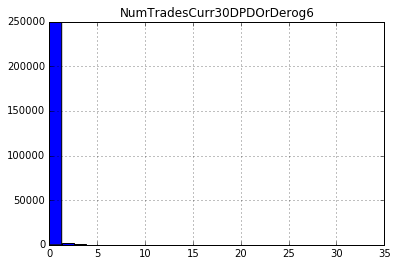

In [101]:
pd.DataFrame(df.NumTradesCurr30DPDOrDerog6).hist(bins = 25);

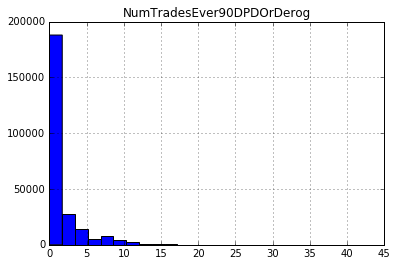

In [102]:
pd.DataFrame(df.NumTradesEver90DPDOrDerog).hist(bins = 25);

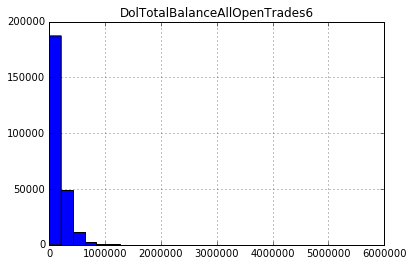

In [103]:
pd.DataFrame(df.DolTotalBalanceAllOpenTrades6).hist(bins = 25);

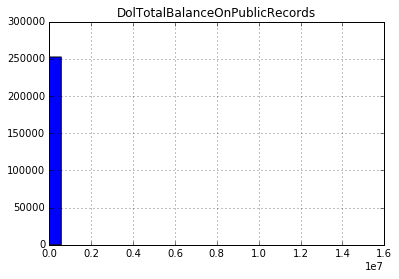

In [104]:
pd.DataFrame(df.DolTotalBalanceOnPublicRecords).hist(bins = 25);

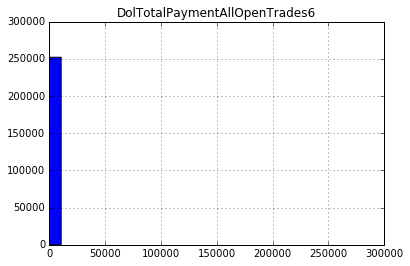

In [105]:
pd.DataFrame(df.DolTotalPaymentAllOpenTrades6).hist(bins = 25);

In [106]:
df.loc[(df['DolTotalPaymentAllOpenTrades6'] >= 50000)].ix[:,61:71]

,EnumChannelCode,NumTrades,NumTradesOpened6,NumTradesDelinqOrPastDue6,NumOpenTradesDelinqOrPastDue6,NumTradesCurr30DPDOrDerog6,NumTradesEver90DPDOrDerog,DolTotalBalanceAllOpenTrades6,DolTotalBalanceOnPublicRecords,DolTotalPaymentAllOpenTrades6
12636,50000,6,0,0,0,0,0,134759,0,134759
120998,40000,14,1,0,0,2,3,256595,0,177904
170939,40000,46,4,0,0,0,0,607901,0,192493
196520,80000,27,0,0,0,0,0,744764,0,261865


### Some outliers in these columns but all seem real

<hr>
# 6) Examine Sixth set of columns

In [107]:
df.ix[:,71:81].columns.tolist()

['AgeOldestTrade',
 'NumInquiries6MinusLastTwoWeeks',
 'PctTradesNeverDelinquent',
 'NumBankcardTradesOpened12',
 'DolTotalAvailBankcardCredit6',
 'DolTotalBalanceInstallTradesReptd6',
 'NumRealEstateTrades',
 'NumRealPropertyTrades',
 'DolTotalBalanceOpenRevolving6',
 'NumTradesEverDerog']

### Description of Each Column
* `AgeOldestTrade` - 
* `NumInquiries6MinusLastTwoWeeks` - 
* `PctTradesNeverDelinquent` - 
* `NumBankcardTradesOpened12` - 
* `DolTotalAvailBankcardCredit6` - 
* `DolTotalBalanceInstallTradesReptd6` - 
* `NumRealEstateTrades` - 
* `NumRealPropertyTrades` - 
* `DolTotalBalanceOpenRevolving6` - 
* `NumTradesEverDerog` - 

In [108]:
df.ix[:,71:81].head(10)

,AgeOldestTrade,NumInquiries6MinusLastTwoWeeks,PctTradesNeverDelinquent,NumBankcardTradesOpened12,DolTotalAvailBankcardCredit6,DolTotalBalanceInstallTradesReptd6,NumRealEstateTrades,NumRealPropertyTrades,DolTotalBalanceOpenRevolving6,NumTradesEverDerog
0,419,0,96,4,439,0,2,4,33956,0
1,430,0,100,7,9609,142383,2,4,14852,0
2,100,2,86,5,1498,9788,0,0,20802,1
3,60,0,100,3,6050,0,0,0,3100,0
4,237,0,90,4,739,32325,1,2,5519,1
5,326,3,95,10,7634,54948,2,3,66704,1
6,325,2,87,3,9000,41365,2,6,0,3
7,91,0,100,3,9404,8873,0,0,596,0
8,277,0,86,3,1514,29954,3,7,6986,4
9,356,1,100,6,40720,30434,3,6,27429,0


In [109]:
df.ix[:,71:81].describe()

,AgeOldestTrade,NumInquiries6MinusLastTwoWeeks,PctTradesNeverDelinquent,NumBankcardTradesOpened12,DolTotalAvailBankcardCredit6,DolTotalBalanceInstallTradesReptd6,NumRealEstateTrades,NumRealPropertyTrades,DolTotalBalanceOpenRevolving6,NumTradesEverDerog
count,252468.000000,252468.000000,252468.000000,252468.000000,252468.000000,252468.000000,252468.000000,252468.000000,252468.000000,252468.000000
mean,220.984707,0.963001,91.621132,5.426878,13817.548858,24377.588051,1.454200,2.115349,18901.745326,1.276110
std,99.327980,1.206907,10.973833,3.014981,21457.325435,31760.952295,1.616979,2.379230,30298.506386,2.608541
min,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,153.000000,0.000000,86.000000,3.000000,2600.000000,4044.000000,0.000000,0.000000,5625.000000,0.000000
50%,208.000000,1.000000,96.000000,5.000000,6928.000000,16163.000000,1.000000,2.000000,10677.000000,0.000000
75%,279.000000,2.000000,100.000000,7.000000,16846.000000,32849.000000,2.000000,3.000000,21194.000000,1.000000
max,600.000000,6.000000,100.000000,36.000000,1919750.000000,1179304.000000,33.000000,52.000000,2064331.000000,43.000000


### Are there any missing data in these columns?


In [110]:
pd.isnull(df.ix[:,71:81]).sum()

AgeOldestTrade                        0
NumInquiries6MinusLastTwoWeeks        0
PctTradesNeverDelinquent              0
NumBankcardTradesOpened12             0
DolTotalAvailBankcardCredit6          0
DolTotalBalanceInstallTradesReptd6    0
NumRealEstateTrades                   0
NumRealPropertyTrades                 0
DolTotalBalanceOpenRevolving6         0
NumTradesEverDerog                    0
dtype: int64

### No Missing Data
<hr>
### All other Columns seem reasonable

<hr>
# 7) Examine Seventh set of columns

In [111]:
df.ix[:,81:91].columns.tolist()

['DolMonthlyDebt',
 'NumCurrentDelinquencies',
 'NumDelinquencies84',
 'NumPublicRecordsLast10Years',
 'NumPublicRecords12',
 'DateFirstCredit',
 'NumCreditLines84',
 'NumInquiries6',
 'DolAmountDelinquent',
 'NumCurrentCreditLines']

### Description of Each Column
* `DolMonthlyDebt` - 
* `NumCurrentDelinquencies` - 
* `NumDelinquencies84` - 
* `NumPublicRecordsLast10Years` - 
* `NumPublicRecords12` - 
* `DateFirstCredit` - 
* `NumCreditLines84` - 
* `NumInquiries6` - 
* `DolAmountDelinquent` - 
* `NumCurrentCreditLines` - 

In [112]:
df.ix[:,81:91].head(10)

,DolMonthlyDebt,NumCurrentDelinquencies,NumDelinquencies84,NumPublicRecordsLast10Years,NumPublicRecords12,DateFirstCredit,NumCreditLines84,NumInquiries6,DolAmountDelinquent,NumCurrentCreditLines
0,1242,0,1,0,0,1978-11-03 08:00:00,35,0,0,11
1,2289,0,0,0,0,1977-12-01 08:00:00,54,0,0,15
2,911,0,2,0,0,2005-07-19 07:00:00,17,2,0,8
3,223,0,0,0,0,2008-11-04 08:00:00,8,0,0,7
4,1264,1,4,2,0,1994-02-04 08:00:00,43,0,0,11
5,3455,0,4,0,0,1986-09-01 07:00:00,47,4,0,23
6,1488,0,2,1,0,1986-10-03 07:00:00,36,2,0,9
7,308,0,0,0,0,2006-04-11 07:00:00,9,0,0,5
8,846,0,12,1,0,1990-10-05 07:00:00,37,0,0,7
9,1559,0,0,0,0,1984-03-01 08:00:00,35,1,0,13


In [113]:
df.ix[:,81:91].describe()

,DolMonthlyDebt,NumCurrentDelinquencies,NumDelinquencies84,NumPublicRecordsLast10Years,NumPublicRecords12,NumCreditLines84,NumInquiries6,DolAmountDelinquent,NumCurrentCreditLines
count,252468.000000,252468.000000,252468.000000,252468.000000,252468.000000,252468.000000,252468.000000,252468.000000,252468.000000
mean,1095.660008,0.277897,4.141939,0.293768,0.004618,27.898157,1.200655,854.677215,11.493706
std,765.479875,0.954424,10.357019,0.664577,0.078773,12.926142,1.512367,11111.227480,5.245093
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000
25%,570.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,8.000000
50%,936.000000,0.000000,0.000000,0.000000,0.000000,26.000000,1.000000,0.000000,11.000000
75%,1436.000000,0.000000,2.000000,0.000000,0.000000,35.000000,2.000000,0.000000,14.000000
max,27404.000000,44.000000,99.000000,59.000000,6.000000,133.000000,19.000000,3348000.000000,65.000000


### Are there any missing data in these columns?


In [114]:
pd.isnull(df.ix[:,81:91]).sum()

DolMonthlyDebt                 0
NumCurrentDelinquencies        0
NumDelinquencies84             0
NumPublicRecordsLast10Years    0
NumPublicRecords12             0
DateFirstCredit                0
NumCreditLines84               0
NumInquiries6                  0
DolAmountDelinquent            0
NumCurrentCreditLines          0
dtype: int64

### No Missing Data in these columns

In [115]:
df.loc[(df['DolAmountDelinquent'] >= 500000)].ix[:,81:91]

,DolMonthlyDebt,NumCurrentDelinquencies,NumDelinquencies84,NumPublicRecordsLast10Years,NumPublicRecords12,DateFirstCredit,NumCreditLines84,NumInquiries6,DolAmountDelinquent,NumCurrentCreditLines
16896,1866,2,41,0,0,1987-03-02 08:00:00,23,3,3348000,10
126846,952,2,6,0,0,1979-01-01 08:00:00,41,4,539087,16
128158,1368,2,14,0,0,1988-03-02 08:00:00,16,0,560721,7
169828,1492,1,15,1,0,1995-11-16 08:00:00,32,1,2297108,11


### There are couple of outliers but these seem real

## Split DateFirstCredit into separate Date Features

In [116]:
## DateFirstCredit
df['DateFirstCredit_Year'] = df.DateFirstCredit.apply(lambda x: x.split('-')[0]).astype(double)
df['DateFirstCredit_Month'] = df.DateFirstCredit.apply(lambda x: x.split('-')[1]).astype(double)
df['DateFirstCredit_Day'] = df.DateFirstCredit.apply(lambda x: x.split('-')[2]).apply(lambda x: x.split(' ')[0]).astype(double)

In [117]:
# rearrange columns so new columns are adjacent to the original features
cols = df.columns.tolist()
cols = cols[0:87] + cols[-3:] + cols[87:-3]
df = df[cols]

In [118]:
# Drop DateFirstCredit Column
df.drop(['DateFirstCredit'], inplace=True, axis=1)

In [119]:
df.ix[:,81:94].head()

,DolMonthlyDebt,NumCurrentDelinquencies,NumDelinquencies84,NumPublicRecordsLast10Years,NumPublicRecords12,DateFirstCredit_Year,DateFirstCredit_Month,DateFirstCredit_Day,NumCreditLines84,NumInquiries6,DolAmountDelinquent,NumCurrentCreditLines,NumOpenCreditLines
0,1242,0,1,0,0,1978,11,3,35,0,0,11,8
1,2289,0,0,0,0,1977,12,1,54,0,0,15,14
2,911,0,2,0,0,2005,7,19,17,2,0,8,7
3,223,0,0,0,0,2008,11,4,8,0,0,7,7
4,1264,1,4,2,0,1994,2,4,43,0,0,11,11


<hr>
# 8) Examine Eighth set of columns

In [120]:
df.ix[:,94:104].columns.tolist()

['PctBankcardUtil',
 'NumOpenRevolvingAccounts',
 'DolRealEstateBalance',
 'DolRevolvingBalance',
 'DolRealEstatePayment',
 'NumTotalInquiries',
 'NumSatisfactoryAccounts',
 'NumWasDelinquentDerog',
 'NumDelinquenciesOver30Days',
 'NumDelinquenciesOver60Days']

### Description of Each Column
* `NumOpenCreditLines` - 
* `PctBankcardUtil` - 
* `NumOpenRevolvingAccounts` - 
* `DolRealEstateBalance` - 
* `DolRevolvingBalance` - 
* `DolRealEstatePayment` - 
* `NumTotalInquiries` - 
* `NumSatisfactoryAccounts` - 
* `NumWasDelinquentDerog` - 
* `NumDelinquenciesOver30Days` - 

In [121]:
df.ix[:,94:104].head(10)

,PctBankcardUtil,NumOpenRevolvingAccounts,DolRealEstateBalance,DolRevolvingBalance,DolRealEstatePayment,NumTotalInquiries,NumSatisfactoryAccounts,NumWasDelinquentDerog,NumDelinquenciesOver30Days,NumDelinquenciesOver60Days
0,0.97,7,87475,52941,583,5,33,2,8,1
1,0.48,10,541060,17064,2611,3,53,1,2,1
2,0.93,5,0,20802,0,5,15,2,3,2
3,0.26,7,0,3100,0,1,8,0,0,0
4,0.81,9,0,5558,0,17,39,3,7,5
5,0.87,22,330480,82028,2498,8,45,2,5,2
6,0.00,5,106160,0,705,8,30,6,4,5
7,0.05,5,0,839,0,1,9,0,0,0
8,0.82,4,0,6986,0,8,31,6,5,4
9,0.37,10,240674,27429,1419,3,35,0,0,0


In [122]:
df.ix[:,94:104].describe()

,PctBankcardUtil,NumOpenRevolvingAccounts,DolRealEstateBalance,DolRevolvingBalance,DolRealEstatePayment,NumTotalInquiries,NumSatisfactoryAccounts,NumWasDelinquentDerog,NumDelinquenciesOver30Days,NumDelinquenciesOver60Days
count,252468.000000,252468.000000,252468.000000,252468.000000,252468.000000,252468.000000,252468.000000,252468.000000,252468.000000,252468.000000
mean,0.552455,8.658884,103667.448453,20696.609111,789.447332,5.227205,25.410428,2.208474,3.294184,1.652879
std,0.263586,4.629501,158696.825861,34410.615303,1469.217618,4.350457,12.261811,3.437060,6.372456,3.672438
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.360000,5.000000,0.000000,6075.000000,0.000000,2.000000,17.000000,0.000000,0.000000,0.000000
50%,0.570000,8.000000,0.000000,11602.000000,0.000000,4.000000,24.000000,1.000000,1.000000,0.000000
75%,0.770000,11.000000,169600.250000,23154.000000,1323.000000,7.000000,32.000000,3.000000,4.000000,2.000000
max,3.430000,66.000000,5913717.000000,3446129.000000,261026.000000,66.000000,133.000000,45.000000,99.000000,99.000000


### Are there any missing data in these columns?


In [123]:
pd.isnull(df.ix[:,94:104]).sum()

PctBankcardUtil               0
NumOpenRevolvingAccounts      0
DolRealEstateBalance          0
DolRevolvingBalance           0
DolRealEstatePayment          0
NumTotalInquiries             0
NumSatisfactoryAccounts       0
NumWasDelinquentDerog         0
NumDelinquenciesOver30Days    0
NumDelinquenciesOver60Days    0
dtype: int64

### No Missing Data
<hr>
### There are couple of outliers but these seem real

<hr>
# 9) Examine Ninth (and Last) set of columns

In [124]:
df.ix[:,104:].columns.tolist()

['BoolOwnsHome',
 'EnumLoanFractionalType',
 'DateWholeLoanStart',
 'DateWholeLoanEnd',
 'BoolEverWholeLoan',
 'BoolIsFractionalLoan']

### Description of Each Column
* `NumDelinquenciesOver60Days` - 
* `BoolOwnsHome` - 
* `EnumLoanFractionalType` - 
* `DateWholeLoanStart` - 
* `DateWholeLoanEnd` - 
* `BoolEverWholeLoan` - 
* `BoolIsFractionalLoan` - 

In [125]:
df.ix[:,104:].head(10)

,BoolOwnsHome,EnumLoanFractionalType,DateWholeLoanStart,DateWholeLoanEnd,BoolEverWholeLoan,BoolIsFractionalLoan
0,True,3,2014-01-26 18:28:42.477000,NaN,True,False
1,True,2,2014-01-09 23:49:48.150000,NaN,True,False
2,False,1,NaN,NaN,False,True
3,False,3,2014-01-02 23:47:33.943000,NaN,True,False
4,False,1,NaN,NaN,False,True
5,True,3,2014-01-09 15:50:28.617000,NaN,True,False
6,True,3,2014-01-02 15:30:27.903000,NaN,True,False
7,False,2,2014-01-02 15:30:28.487000,NaN,True,False
8,False,2,2014-01-09 15:50:28.880000,NaN,True,False
9,True,1,NaN,NaN,False,True


In [126]:
df.ix[:,104:].describe()

,BoolOwnsHome,EnumLoanFractionalType,BoolEverWholeLoan,BoolIsFractionalLoan
count,252468,252468.000000,252468,252468
mean,0.492593,2.549151,0.922398,0.103312
std,0.499946,0.684431,0.267545,0.304367
min,False,1.000000,False,False
25%,0,2.000000,1,0
50%,0,3.000000,1,0
75%,1,3.000000,1,0
max,True,3.000000,True,True


### Are there any missing data in these columns?


In [127]:
pd.isnull(df.ix[:,104:]).sum()

BoolOwnsHome                   0
EnumLoanFractionalType         0
DateWholeLoanStart         19592
DateWholeLoanEnd          245977
BoolEverWholeLoan              0
BoolIsFractionalLoan           0
dtype: int64

<hr>
### Convert to Boolean data type `BoolOwnsHome ` to integer

In [128]:
df['BoolOwnsHome'].dtypes

dtype('bool')

In [129]:
df['BoolOwnsHome'] = df['BoolOwnsHome'].astype(int)

In [130]:
df['BoolOwnsHome'].head()

0    1
1    1
2    0
3    0
4    0
Name: BoolOwnsHome, dtype: int64

### Examine EnumLoanFractionalType 

In [131]:
# First check Unique Values in EnumLoanFractionalType
pd.unique(df.EnumLoanFractionalType.ravel())

array([3, 2, 1])

### Most likely some type of classification with ordinal value
### Keep as one feature and then convert to factor using H2O

In [132]:
df.head()

,ListingNumber,DateListingDelay,DateCreditPulled_Year,DateCreditPulled_Month,DateCreditPulled_Day,DateCreditPulled_day_of_week,DateCreditPulled_day_of_year,DateCreditPulled_weekofyear,DateCreditPulled_is_month_start,DateCreditPulled_is_month_end,...,NumSatisfactoryAccounts,NumWasDelinquentDerog,NumDelinquenciesOver30Days,NumDelinquenciesOver60Days,BoolOwnsHome,EnumLoanFractionalType,DateWholeLoanStart,DateWholeLoanEnd,BoolEverWholeLoan,BoolIsFractionalLoan
0,973605,105,2013,10,13,6,286,41,0,0,...,33,2,8,1,1,3,2014-01-26 18:28:42.477000,NaN,True,False
1,981099,86,2013,10,15,1,288,42,0,0,...,53,1,2,1,1,2,2014-01-09 23:49:48.150000,NaN,True,False
2,1025766,76,2013,11,6,2,310,45,0,0,...,15,2,3,2,0,1,NaN,NaN,False,True
3,1003835,55,2013,11,8,4,312,45,0,0,...,8,0,0,0,0,3,2014-01-02 23:47:33.943000,NaN,True,False
4,1011335,59,2013,11,11,0,315,46,0,0,...,39,3,7,5,0,1,NaN,NaN,False,True


### Examine DateWholeLoanStart and DateWholeLoanEnd

In [133]:
# Using property NaN != NaN
df.loc[(df['DateWholeLoanStart'] != df['DateWholeLoanStart'])].ix[:,104:].head(10)

,BoolOwnsHome,EnumLoanFractionalType,DateWholeLoanStart,DateWholeLoanEnd,BoolEverWholeLoan,BoolIsFractionalLoan
2,0,1,NaN,NaN,False,True
4,0,1,NaN,NaN,False,True
9,1,1,NaN,NaN,False,True
12,0,1,NaN,NaN,False,True
16,1,1,NaN,NaN,False,True
21,0,1,NaN,NaN,False,True
24,0,1,NaN,NaN,False,True
42,1,1,NaN,NaN,False,True
45,1,1,NaN,NaN,False,True
53,0,1,NaN,NaN,False,True


### Determine why this data is missing
* Appears that missing Data is because these are Fractional Loans and Not whole Loans
* EnumLoanFractionalType appears to be 1 - Fractional Loan
* BoolIsFractionalLoan appears to be False

In [134]:
df.loc[(df['DateWholeLoanStart'] != df['DateWholeLoanStart']) & df['EnumLoanFractionalType'] == 1].ix[:,104:].count()

BoolOwnsHome              19592
EnumLoanFractionalType    19592
DateWholeLoanStart            0
DateWholeLoanEnd              0
BoolEverWholeLoan         19592
BoolIsFractionalLoan      19592
dtype: int64

### Confirms that DateWholeLoanStart data is missing because these are Fractional Loans
* Fractional Loans do not depend upon DateWholeLoanStart and DateWholeLoanEnd so set to 0

In [135]:
# Using property NaN != NaN
df.loc[(df['DateWholeLoanEnd'] == df['DateWholeLoanEnd'])].ix[:,104:].head()

,BoolOwnsHome,EnumLoanFractionalType,DateWholeLoanStart,DateWholeLoanEnd,BoolEverWholeLoan,BoolIsFractionalLoan
57,0,1,2014-01-03 23:37:56.937000,2014-01-04 00:45:00.970000,True,True
68,1,1,2014-01-30 15:28:58.170000,2014-01-30 16:45:03.240000,True,True
108,1,1,2014-01-26 18:28:42.920000,2014-01-26 19:45:00.923000,True,True
154,1,1,2014-01-07 15:13:02.097000,2014-01-07 16:45:11.207000,True,True
167,0,1,2014-01-08 23:46:34.877000,2014-01-09 00:45:02.080000,True,True


In [136]:
df.loc[(df['DateWholeLoanEnd'] == df['DateWholeLoanEnd'])].ix[:,104:].count()

BoolOwnsHome              6491
EnumLoanFractionalType    6491
DateWholeLoanStart        6491
DateWholeLoanEnd          6491
BoolEverWholeLoan         6491
BoolIsFractionalLoan      6491
dtype: int64

In [137]:
df.shape

(252468, 110)

### However, there are some EnumLoanFractionalType =1 Loans which have both DateWholeLoanStart and DateWholeLoanEnd with BoolEverWholeLoan and BoolIsFractionalLoan are True
* So story is more complicated
* 245968 + 6490 = 252458 so this explains missing data in DateWholeLoanEnd

### Fill NaNs with 0's and Split up into Date Features

In [138]:
df['DateWholeLoanStart'] = df.DateWholeLoanStart.fillna(value='0-0-0 ')

In [139]:
df.ix[:,104:].head(10)

,BoolOwnsHome,EnumLoanFractionalType,DateWholeLoanStart,DateWholeLoanEnd,BoolEverWholeLoan,BoolIsFractionalLoan
0,1,3,2014-01-26 18:28:42.477000,NaN,True,False
1,1,2,2014-01-09 23:49:48.150000,NaN,True,False
2,0,1,0-0-0,NaN,False,True
3,0,3,2014-01-02 23:47:33.943000,NaN,True,False
4,0,1,0-0-0,NaN,False,True
5,1,3,2014-01-09 15:50:28.617000,NaN,True,False
6,1,3,2014-01-02 15:30:27.903000,NaN,True,False
7,0,2,2014-01-02 15:30:28.487000,NaN,True,False
8,0,2,2014-01-09 15:50:28.880000,NaN,True,False
9,1,1,0-0-0,NaN,False,True


In [140]:
## DateWholeLoanStart
df['DateWholeLoanStart_Year'] = df.DateWholeLoanStart.apply(lambda x: x.split('-')[0]).astype(double)
df['DateWholeLoanStart_Month'] = df.DateWholeLoanStart.apply(lambda x: x.split('-')[1]).astype(double)
df['DateWholeLoanStart_Day'] = df.DateWholeLoanStart.apply(lambda x: x.split('-')[2]).apply(lambda x: x.split(' ')[0]).astype(double)

In [141]:
df['DateWholeLoanEnd'] = df.DateWholeLoanEnd.fillna(value='0-0-0 ')

In [142]:
## DateWholeLoanEnd
df['DateWholeLoanEnd_Year'] = df.DateWholeLoanEnd.apply(lambda x: x.split('-')[0]).astype(double)
df['DateWholeLoanEnd_Month'] = df.DateWholeLoanEnd.apply(lambda x: x.split('-')[1]).astype(double)
df['DateWholeLoanEnd_Day'] = df.DateWholeLoanEnd.apply(lambda x: x.split('-')[2]).apply(lambda x: x.split(' ')[0]).astype(double)

In [143]:
df.ix[:,104:].head(10)

,BoolOwnsHome,EnumLoanFractionalType,DateWholeLoanStart,DateWholeLoanEnd,BoolEverWholeLoan,BoolIsFractionalLoan,DateWholeLoanStart_Year,DateWholeLoanStart_Month,DateWholeLoanStart_Day,DateWholeLoanEnd_Year,DateWholeLoanEnd_Month,DateWholeLoanEnd_Day
0,1,3,2014-01-26 18:28:42.477000,0-0-0,True,False,2014,1,26,0,0,0
1,1,2,2014-01-09 23:49:48.150000,0-0-0,True,False,2014,1,9,0,0,0
2,0,1,0-0-0,0-0-0,False,True,0,0,0,0,0,0
3,0,3,2014-01-02 23:47:33.943000,0-0-0,True,False,2014,1,2,0,0,0
4,0,1,0-0-0,0-0-0,False,True,0,0,0,0,0,0
5,1,3,2014-01-09 15:50:28.617000,0-0-0,True,False,2014,1,9,0,0,0
6,1,3,2014-01-02 15:30:27.903000,0-0-0,True,False,2014,1,2,0,0,0
7,0,2,2014-01-02 15:30:28.487000,0-0-0,True,False,2014,1,2,0,0,0
8,0,2,2014-01-09 15:50:28.880000,0-0-0,True,False,2014,1,9,0,0,0
9,1,1,0-0-0,0-0-0,False,True,0,0,0,0,0,0


In [144]:
# Drop Date columns since they are no longer needed
df.drop('DateWholeLoanStart', 1, inplace=True)
df.drop('DateWholeLoanEnd', 1, inplace=True)

In [145]:
df.ix[:,104:].head(10)

,BoolOwnsHome,EnumLoanFractionalType,BoolEverWholeLoan,BoolIsFractionalLoan,DateWholeLoanStart_Year,DateWholeLoanStart_Month,DateWholeLoanStart_Day,DateWholeLoanEnd_Year,DateWholeLoanEnd_Month,DateWholeLoanEnd_Day
0,1,3,True,False,2014,1,26,0,0,0
1,1,2,True,False,2014,1,9,0,0,0
2,0,1,False,True,0,0,0,0,0,0
3,0,3,True,False,2014,1,2,0,0,0
4,0,1,False,True,0,0,0,0,0,0
5,1,3,True,False,2014,1,9,0,0,0
6,1,3,True,False,2014,1,2,0,0,0
7,0,2,True,False,2014,1,2,0,0,0
8,0,2,True,False,2014,1,9,0,0,0
9,1,1,False,True,0,0,0,0,0,0


In [146]:
# rearrange columns so new column is adjacent to the original features
cols = df.columns.tolist()
cols = cols[0:106] + cols[-6:] + cols[106:-6]
df = df[cols]

### Convert to Boolean data types `BoolEverWholeLoan` and `BoolIsFractionalLoan` to integer

In [147]:
df['BoolEverWholeLoan'].dtypes

dtype('bool')

In [148]:
df['BoolEverWholeLoan'] = df['BoolEverWholeLoan'].astype(int)

In [149]:
df['BoolEverWholeLoan'].head()

0    1
1    1
2    0
3    1
4    0
Name: BoolEverWholeLoan, dtype: int64

In [150]:
df['BoolIsFractionalLoan'].dtypes

dtype('bool')

In [151]:
df['BoolIsFractionalLoan'] = df['BoolIsFractionalLoan'].astype(int)

In [152]:
df['BoolIsFractionalLoan'].head()

0    0
1    0
2    1
3    0
4    1
Name: BoolIsFractionalLoan, dtype: int64

In [153]:
df.columns.tolist()

['ListingNumber',
 'DateListingDelay',
 'DateCreditPulled_Year',
 'DateCreditPulled_Month',
 'DateCreditPulled_Day',
 'DateCreditPulled_day_of_week',
 'DateCreditPulled_day_of_year',
 'DateCreditPulled_weekofyear',
 'DateCreditPulled_is_month_start',
 'DateCreditPulled_is_month_end',
 'DateListingStart_Year',
 'DateListingStart_Month',
 'DateListingStart_Day',
 'DateListingStart_day_of_week',
 'DateListingStart_day_of_year',
 'DateListingStart_weekofyear',
 'DateListingStart_is_month_start',
 'DateListingStart_is_month_end',
 'DateListingCreation_Year',
 'DateListingCreation_Month',
 'DateListingCreation_Day',
 'DateListingCreation_day_of_week',
 'DateListingCreation_day_of_year',
 'DateListingCreation_weekofyear',
 'DateListingCreation_is_month_start',
 'DateListingCreation_is_month_end',
 'EnumListingStatus',
 'DolLoanAmountRequested',
 'BoolPartialFundingApproved',
 'CreditGrade',
 'LenderYield',
 'BorrowerRate',
 'NumMonthsTerm',
 'DolMonthlyLoanPayment',
 'FICOScore',
 'ProsperSco

### Move to Last Column for Convenience


In [154]:
cols = df.columns.tolist()
cols =  cols[0:26]+ cols[27:] + cols[26:27]
df = df[cols]

In [155]:
df.head()

,ListingNumber,DateListingDelay,DateCreditPulled_Year,DateCreditPulled_Month,DateCreditPulled_Day,DateCreditPulled_day_of_week,DateCreditPulled_day_of_year,DateCreditPulled_weekofyear,DateCreditPulled_is_month_start,DateCreditPulled_is_month_end,...,EnumLoanFractionalType,DateWholeLoanStart_Year,DateWholeLoanStart_Month,DateWholeLoanStart_Day,DateWholeLoanEnd_Year,DateWholeLoanEnd_Month,DateWholeLoanEnd_Day,BoolEverWholeLoan,BoolIsFractionalLoan,EnumListingStatus
0,973605,105,2013,10,13,6,286,41,0,0,...,3,2014,1,26,0,0,0,1,0,1
1,981099,86,2013,10,15,1,288,42,0,0,...,2,2014,1,9,0,0,0,1,0,1
2,1025766,76,2013,11,6,2,310,45,0,0,...,1,0,0,0,0,0,0,0,1,0
3,1003835,55,2013,11,8,4,312,45,0,0,...,3,2014,1,2,0,0,0,1,0,1
4,1011335,59,2013,11,11,0,315,46,0,0,...,1,0,0,0,0,0,0,0,1,0


In [156]:
df.to_csv('data/theorem_output_factors.csv')